# Failed rifting and fast drifting: a state-of-the-art compilation of the Logan Loop and Keweenawan Track

This notebook contains code and visualizations associated with the following paper:

Swanson-Hysell, N.L., Ramenzani, J., Fairchild, L.M. and Rose, I., **Failed rifting and fast drifting: Midcontinent Rift development, Laurentia's rapid motion and the driver of Grenvillian orogenesis**, *Geological Society of America Bulletin*, doi:10.1130/B31944.1.

Corresponding Author: Nicholas L. Swanson-Hysell (swanson-hysell@berkeley.edu)


# Import libraries for data analysis


In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import matplotlib.pyplot as plt
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', -1)
from IPython.core.display import HTML
import numpy as np
import scipy as sp
from scipy import special
import warnings
warnings.filterwarnings('ignore')

This notebook runs with figures inline (instead of opening up in another window) that are in svg format by executing these commands:

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# %conda install mpltoolkits

Throughout this analysis there will be maps that show pole positions. The pole_figure_appearance function controls aspects of the appearance of these plots and eliminates the need to make these customizations for every plot.

In [3]:
def pole_figure_appearance():
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))

Let's create an empty dataframe that will be populated with pole means called 'pole_means'.

<b>PoleName | SLat | SLon | PLat | Plon | A95 | PolarityZone | PmagRef | AgeNominal | AgeLower | AgeUpper | AgeInfo | Q  </b>

<b>Pole_name</b> = Name of pole which corresponds to volcanic group <br>
<b>SLat</b> = Sample area decimal latitude (e.g. -56.2)<br>
<b>SLon</b> = Sample area decimal longitude (e.g. 134.8)<br>
<b>PLat</b> = Palaeomagnetic pole decimal latitude (e.g. -56.2)<br>
<b>PLon</b> = Palaeomagnetic pole decimal longitude (e.g. 134.8)<br>
<b>A95</b> = 95% confidence limit on pole in degrees (e.g. 6.2)<br>
<b>k</b> = Fisher precision parameter (e.g. 42.5)<br>
<b>N</b> = Number of VGPs used to calculate the mean<br>
<b>PolarityZone</b> = Assigned polarity zone<br>
<b>AgeNominal</b> = Mean / representative age of sampled formation (e.g. 1105.1)<br>
<b>AgeLower</b> = Estimate lower bound on age uncertainty (e.g. 1103.2)<br>
<b>AgeUpper</b> = Estimate upper bound on age uncertainty (e.g. 1107.4)<br>
<b>Gaussian_2sigma</b> = 2sigma error if Gaussian Distribution is to be used<br>
<b>GaussianOrUniform</b> = Distribution type used for Bayesian inversion<br>
<b>Q</b> = Van der Voo quality criteria (0 - 7)<br>

In [4]:
pole_means = pd.DataFrame(columns=['PoleName','SLat','SLon','PLat','PLon',
                                   'A95','K','N','PolarityZone','PmagRef',
                                   'AgeNominal','AgeLower','AgeUpper',
                                   'AgeInfo','AgeRef','Gaussian_2sigma',
                                   'GaussianOrUniform','Q','color'])

# Data compilation by volcanic group

## Osler Volcanic Group
<a id='Osler'></a>
As described in the main text, the Osler Volcanic Group is a sequence of Midcontinent Rift lava flows exposed on Black Bay Peninsula and the Lake Superior Archipelago in northern Lake Superior. The Osler Volcanic Group is dominantly of reversed polarity with a paleomagnetic reversal very near to the top of the exposed stratigraphy (Halls, 1974). This reversal is associated with the deposition of a conglomerate unit and an angular unconformity.

Data from both Halls (1974), Swanson-Hysell et al. (2014b) and this study can be used to develop mean paleomagnetic poles for the group. This compilation takes the approach used in Swanson-Hysell et al. (2014b) wherein data from the Swanson-Hysell et al. (2014b) study are binned on the basis of their position within the stratigraphic succession.  Data from the lower third of the Simpson Island stratigraphic succession from Swanson-Hysell et al. (2014b) are considered independently while data from the upper third are combined with the reversed data of Halls (1974) and this study from near the top of the succesion in the  Nipigon Strait region. These reversed polarity lavas from high in the succession are in close stratigraphic proximity to a sequence of felsic flows at Agate Point---one of which was dated by Davis and Green (1997) with a resulting $^{207}$Pb/$^{206}$Pb date on zircon of 1105.3±2.1 Ma. In this study, we present a new CA-ID-TIMS $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date on zircon from one of the Agate Point rhyolite flows. Data from nine zircon grains yield a weighted mean $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of 1105.15 ± 0.33/0.56 Ma. This date provides an excellent constraint on the age of the upper reversed pole.

Let's unpack the data using the **ipmag.download_magic()** function and then import these data into Pandas dataframes:

Halls, H. (1974), A paleomagnetic reversal in the Osler Volcanic Group, 
northern Lake Superior, Can. J. Earth Sci., 11, 1200–1207, 
doi:10.1139/e74-113. 

Link to MagIC contribution: http://earthref.org/MAGIC/doi/10.1139/e74-113
            
and

Swanson-Hysell, N. L., A. A. Vaughan, M. R. Mustain, and K. E. Asp (2014), Confirmation of progressive plate motion during the Midcontinent Rift’s early magmatic stage from the Osler Volcanic Group, Ontario, Canada, Geochem. Geophys. Geosyst., 15, 2039–2047, doi:10.1002/2013GC005180. 

Link to MagIC contribution: http://earthref.org/MAGIC/doi/10.1002/2013GC005180

In addition to the data previously developed in Swanson-Hysell et al. (2014) and Halls (1974), we have developed new data from 5 more basaltic lava flows from the Agate Point section where the dated AP71 sample was also collected. These flows are from the upper portion of the reversed stratigraphy and should be added to OslerR_upper pole. We have also developed data from 2 flows of normal polarity above the angular unconformity.

### Import Halls (1974) data

In [5]:
Halls1974_sites = pd.read_csv('Halls1974/sites.txt',sep='\t',header=1)

We are interested in using tilt-corrected data so will filter the DataFrame such that only data with dir_tilt_correction of 100 are included. We also wish to consider data from reversed and normal flows separately so will create DataFrames for each polarity.

In [6]:
Halls1974_sites_tc = Halls1974_sites[Halls1974_sites['dir_tilt_correction']==100]
Halls1974_sites_r = Halls1974_sites_tc[Halls1974_sites_tc['location']=='Osler Volcanics, Nipigon Strait, Lower Reversed']
Halls1974_sites_n = Halls1974_sites_tc[Halls1974_sites_tc['location']=='Osler Volcanics, Nipigon Strait, Upper Normal']

### Import Swanson-Hysell et al. (2014b) data

In [7]:
SH2014_sites = pd.read_csv('Swanson-Hysell2014b/sites.txt',sep='\t',header=1)

Split Swanson-Hysell et al. (2014b) data by stratigraphic posiition into the lower and upper third and then combine the data from the upper third with the reversed data from the Halls (1974) Nipigon Strait region study as done in Swanson-Hysell et al. (2014b) using the same stratigraphic levels.

In [8]:
SH2014_OslerR_lower = SH2014_sites[SH2014_sites.height<1041]
SH2014_OslerR_upper = SH2014_sites[SH2014_sites.height>2082]

### Import new Osler results

In [9]:
new_Osler_sites = pd.read_csv('Swanson-Hysell2019a/Agate_Point/sites.txt',
                              sep='\t',skiprows=1)
new_Osler_sites_tiltcorrected = new_Osler_sites[new_Osler_sites.dir_tilt_correction == 100]
new_Osler_sites_AP = new_Osler_sites_tiltcorrected[new_Osler_sites_tiltcorrected.location == 'Agate Point']
new_Osler_sites_AP['vgp_lat'] = -new_Osler_sites_AP['vgp_lat']
new_Osler_sites_AP['vgp_lon'] = new_Osler_sites_AP['vgp_lon']+180
new_Osler_sites_Puff = new_Osler_sites_tiltcorrected[new_Osler_sites_tiltcorrected.location == 'Puff Island']

In [10]:
SH2014_OslerR_lower_vgps = ipmag.make_di_block(SH2014_OslerR_lower['vgp_lon'].tolist(),
                              SH2014_OslerR_lower['vgp_lat'].tolist())
SH2014_OslerR_upper_vgps = ipmag.make_di_block(SH2014_OslerR_upper['vgp_lon'].tolist(),
                              SH2014_OslerR_upper['vgp_lat'].tolist())
Halls1974_OslerR_vgps = ipmag.make_di_block(Halls1974_sites_r['vgp_lon'].tolist(),
                              Halls1974_sites_r['vgp_lat'].tolist())
AgatePoint_OslerR_vgps = ipmag.make_di_block(new_Osler_sites_AP['vgp_lon'].tolist(),
                              new_Osler_sites_AP['vgp_lat'].tolist())

### Osler reverse (R1; lower Alona Bay reversed-polarity zone) pole

In [11]:
Osler_lowerR = SH2014_OslerR_lower
Osler_lowerR['age'] = 1108 
Osler_lowerR['age_high'] = 1110
Osler_lowerR['age_low'] = 1105.15

In [12]:
Osler_lowerR_pole = pmag.fisher_mean(SH2014_OslerR_lower_vgps)
ipmag.print_pole_mean(Osler_lowerR_pole)

Plon: 218.6  Plat: 40.9
Number of directions in mean (n): 30
Angular radius of 95% confidence (A_95): 4.8
Precision parameter (k) estimate: 31.5


### Osler reverse (R2; upper Alona Bay reversed-polarity zone) pole

In [13]:
Osler_upperR = pd.concat([SH2014_OslerR_upper,Halls1974_sites_r,new_Osler_sites_AP])
Osler_upperR['age'] = 1105.15
Osler_upperR['age_high'] = 1105.48
Osler_upperR['age_low'] = 1104.82
Osler_upperR = Osler_upperR.reset_index(drop=1)
# Osler_upperR

In [14]:
Osler_upperR_pole_new = pmag.fisher_mean(SH2014_OslerR_upper_vgps+Halls1974_OslerR_vgps+AgatePoint_OslerR_vgps)
ipmag.print_pole_mean(Osler_upperR_pole_new)

Plon: 203.4  Plat: 42.3
Number of directions in mean (n): 64
Angular radius of 95% confidence (A_95): 3.7
Precision parameter (k) estimate: 24.4


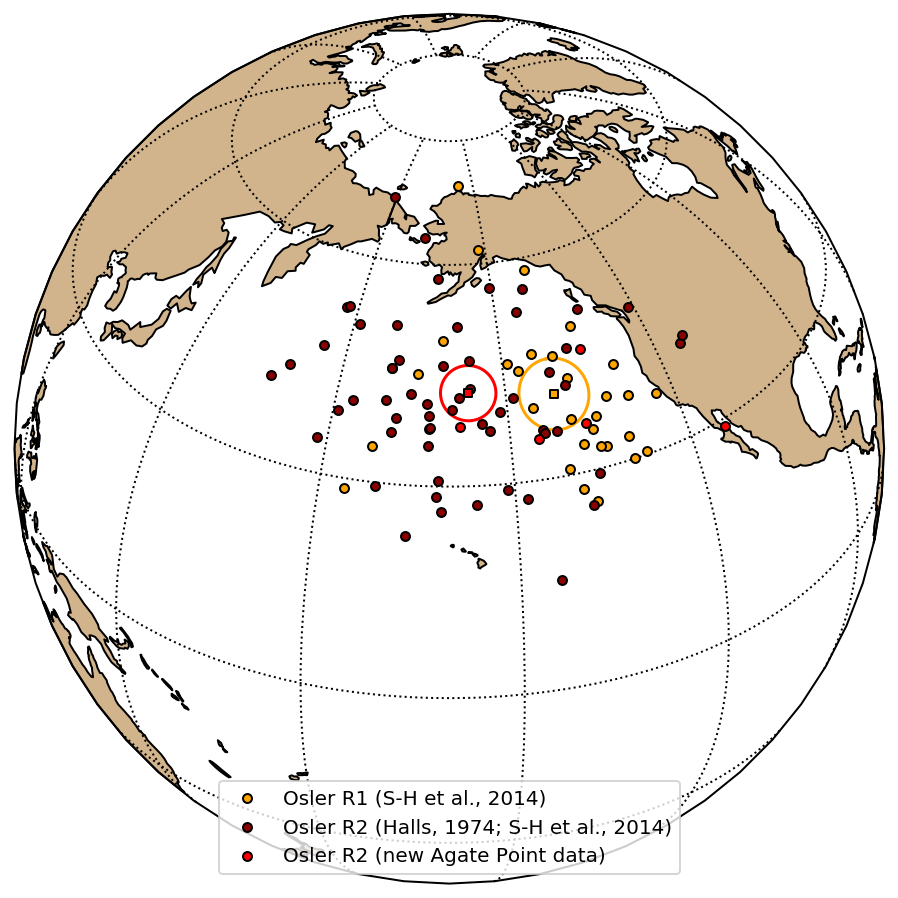

In [15]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,SH2014_OslerR_lower['vgp_lon'].tolist(),
               SH2014_OslerR_lower['vgp_lat'].tolist(),
               color='Orange',label='Osler R1 (S-H et al., 2014)')
ipmag.plot_vgp(m,SH2014_OslerR_upper['vgp_lon'].tolist()+Halls1974_sites_r['vgp_lon'].tolist(),
               SH2014_OslerR_upper['vgp_lat'].tolist()+Halls1974_sites_r['vgp_lat'].tolist(),
               color='DarkRed',label='Osler R2 (Halls, 1974; S-H et al., 2014)')
ipmag.plot_vgp(m,di_block=AgatePoint_OslerR_vgps,
               color='Red',label='Osler R2 (new Agate Point data)')
ipmag.plot_pole(m,Osler_lowerR_pole['dec'],Osler_lowerR_pole['inc'],
                Osler_lowerR_pole['alpha95'],marker='s',color='orange')
ipmag.plot_pole(m,Osler_upperR_pole_new['dec'],Osler_upperR_pole_new['inc'],
                Osler_upperR_pole_new['alpha95'],marker='s',color='r')
plt.legend(loc=8)
plt.show()

These mean poles can be added to the pole_means dataframe. In terms of Q factor, a fold test on the Osler R2 pole utilizing the directional data of both Halls (1974) and Swanson-Hysell et al. (2014b) passes Tauxe and Watson (1994) and McFadden and McElhinny (1990) fold tests (Tauxe et al., 2016). Given evidence for early tilting (e.g. the angular unconformity associated with the syn-rift volcanism Puff Island Conglomerate), this test provided evidence for a primary origin of magnetization. The Osler reverse (lower) data have no such test, although there are younger dikes of normal polarity within the reversed volcanics (that likely correspond to Portage Lake normal-polarity zone) providing additional evidence that the reversed volcanics have not be remagnetized. Buchan et al. (2001) considered the reversed Osler Volcanic Group pole to be a "key pole" and made the additional argument that the unconformity test provides strong evidence for a primary origin of remanence:

> Remanence is considered primary because the position of the prominent Keweenawan polarity reversal in the Upper Osler lavas coincides exactly with the position of an unconformity in the sequence (Halls, 1974).

In [16]:
pole_means.loc['Osler_R1'] = pd.Series({'PoleName' : 'Osler reverse (lower)',
                                        'SLat' : 48.80,
                                        'SLon' : 360-87.66,
                                        'PLat' : round(Osler_lowerR_pole['inc'],1),
                                        'PLon' : round(Osler_lowerR_pole['dec'],1),
                                        'A95' : round(Osler_lowerR_pole['alpha95'],1),
                                        'K' : round(Osler_lowerR_pole['k'],1),
                                        'N' : int(Osler_lowerR_pole['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell et al., 2014b',
                                        'AgeNominal' : 1108,
                                        'AgeLower' : 1105.15,
                                        'AgeUpper' : 1110,
                                        'AgeInfo' : 'Older than 1105.15 $\pm$ 0.33 Ma Osler reverse (upper) pole, perhaps similar in age in Logan Sills ($^{\mathrm{207}}$Pb/$^{\mathrm{206}}$Pb date of 1109 $\pm$ 1 Ma)',
                                        'AgeRef' : 'Davis and Sutcliffe, 1985; this study',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : 7,
                                        'color' : '#B82431'})

pole_means.loc['Osler_R2'] = pd.Series({'PoleName' : 'Osler reverse (upper)',
                                        'SLat' : 48.59,
                                        'SLon' : 360-88.19,
                                        'PLat' : round(Osler_upperR_pole_new['inc'],1),
                                        'PLon' : round(Osler_upperR_pole_new['dec'],1),
                                        'A95' : round(Osler_upperR_pole_new['alpha95'],1),
                                        'N' : int(Osler_upperR_pole_new['n']),
                                        'K' : round(Osler_upperR_pole_new['k'],1),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Halls, 1974; Swanson-Hysell et al., 2014b; this study',
                                        'AgeNominal' : 1105.15,
                                        'AgeLower' : 1104.82,
                                        'AgeUpper' : 1105.48,
                                        'AgeInfo' : '$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of 1105.15 $\pm$ 0.33 Ma for a rhyolite at Agate Point (this study)',
                                        'AgeRef' : 'this study',
                                        'GaussianOrUniform' : 'gaussian',
                                        'Gaussian_2sigma' : 0.33,
                                        'Q' : 7,
                                        'color' : '#F2A07E'})

### Osler normal pole

The study of Halls (1974) included 5 normal sites and previous poles utilizing these data have calculated a mean pole wherein each of these sites is equally weighted (e.g. Halls and Pesonen, 1982). However, field mapping by Swanson-Hysell and Fairchild in July 2014 of the Osler Volcanic Group in the vicinity of Puff Island in the Lake Superior Archipelago revealed that the 5 normal sites of Halls (1974) are from a total of two flows. Sites 1, 2 and 5 are all from the first thick flow above the Puff Island conglomerate while sites 3 and 4 are from a single flow that forms the SSE shoreline of Puff Island and Tremblay Island.

In [17]:
Osler_N = pd.concat([Halls1974_sites_n,new_Osler_sites_Puff])
Osler_N = Osler_N.reset_index(drop=1)
Osler_N['age'] = 1095 
Osler_N['age_low'] = 1080
Osler_N['age_high'] = 1100

In [18]:
Halls1974_sites_n = Halls1974_sites[Halls1974_sites['location']=='Osler Volcanics, Nipigon Strait, Upper Normal']

To deal with the multiple sites from the same flow, we can calculate the mean direction of the Halls (1974) "sites" for each flow and then calculate the VGP from that mean direction. This method isn't ideal as it would be preferable to calculate Fisher means from the sample level data, but these data are not published.

In [19]:
#Halls flow #1 is sites 1, 2 and 5 which we can separate out into a new list of directions
Halls_N_flow1_directions=[]
Halls_N_flow1_directions.append([Halls1974_sites_n.dir_dec[0], Halls1974_sites_n.dir_inc[0]])
Halls_N_flow1_directions.append([Halls1974_sites_n.dir_dec[1], Halls1974_sites_n.dir_inc[1]])
Halls_N_flow1_directions.append([Halls1974_sites_n.dir_dec[4], Halls1974_sites_n.dir_inc[4]])

#take the Fisher mean of flow 1 directions
Halls_N_flow1_mean=pmag.fisher_mean(Halls_N_flow1_directions)

#Halls flow #2 is sites 3 and 4 which we can separate out into a new list of directions
Halls_N_flow2_directions=[]
Halls_N_flow2_directions.append([Halls1974_sites_n.dir_dec[2], Halls1974_sites_n.dir_inc[2]])
Halls_N_flow2_directions.append([Halls1974_sites_n.dir_dec[3], Halls1974_sites_n.dir_inc[3]])

#take the Fisher mean of flow 2 directions
Halls_N_flow2_mean = pmag.fisher_mean(Halls_N_flow2_directions)

#create a new data frame and insert the data for the two flows (making sure that the values are floats)
Halls1974_Osler_Data_N_new = pd.DataFrame(columns=['name','site_lat','site_lon','dec_tc','inc_tc'])

Halls1974_Osler_Data_N_new.loc[0]=pd.Series({'name':'Halls_N_flow1', 
                                   'site_lat':Halls1974_sites_n.lat[0],
                                   'site_lon':Halls1974_sites_n.lon[0],
                                   'dec_tc':Halls_N_flow1_mean['dec'],
                                   'inc_tc':Halls_N_flow1_mean['inc']})

Halls1974_Osler_Data_N_new.loc[1]=pd.Series({'name':'Halls_N_flow2', 
                                   'site_lat':Halls1974_sites_n.lat[2],
                                   'site_lon':Halls1974_sites_n.lon[2],
                                   'dec_tc':Halls_N_flow2_mean['dec'],
                                   'inc_tc':Halls_N_flow2_mean['inc']})

Halls1974_Osler_Data_N_new['dec_tc'] = Halls1974_Osler_Data_N_new['dec_tc'].astype(float)
Halls1974_Osler_Data_N_new['inc_tc'] = Halls1974_Osler_Data_N_new['inc_tc'].astype(float)
Halls1974_Osler_Data_N_new['site_lat'] = Halls1974_Osler_Data_N_new['site_lat'].astype(float)
Halls1974_Osler_Data_N_new['site_lon'] = Halls1974_Osler_Data_N_new['site_lon'].astype(float)

#calculate VGPs from the directional data
ipmag.vgp_calc(Halls1974_Osler_Data_N_new)

OslerN_VGPs_Halls=[]
OslerN_Plong_Halls=[]
OslerN_Plat_Halls=[]

for n in range(0,len(Halls1974_Osler_Data_N_new)): 
    Plong,Plat=Halls1974_Osler_Data_N_new['vgp_lon'][n],Halls1974_Osler_Data_N_new['vgp_lat'][n]
    OslerN_Plong_Halls.append(Plong)
    OslerN_Plat_Halls.append(Plat)
    OslerN_VGPs_Halls.append([Plong,Plat,1.])

In addition to the two flows above the angular unconformity studied by Halls (1974), we identified, sampled and developed data from two other flows exposed above the unconformity on Puff Island. After calculating each VGP, we can calculate a new mean pole for the Osler normal polarity volcanics. There are only 4 VGPs from which the Osler normal pole can be calculated making it so that the pole is not robust. There is little prospect for significant improvement of the pole as there only appear to be four flows in total exposed above the Puff Island conglomerate at the current water level of Lake Superior.

In [20]:
PuffIsland_OslerN_vgps = ipmag.make_di_block(new_Osler_sites_Puff['vgp_lon'].tolist(),
                              new_Osler_sites_Puff['vgp_lat'].tolist())

OslerN_pole = pmag.fisher_mean(OslerN_VGPs_Halls+PuffIsland_OslerN_vgps) 
ipmag.print_pole_mean(OslerN_pole)

Plon: 173.7  Plat: 30.2
Number of directions in mean (n): 4
Angular radius of 95% confidence (A_95): 8.6
Precision parameter (k) estimate: 114.6


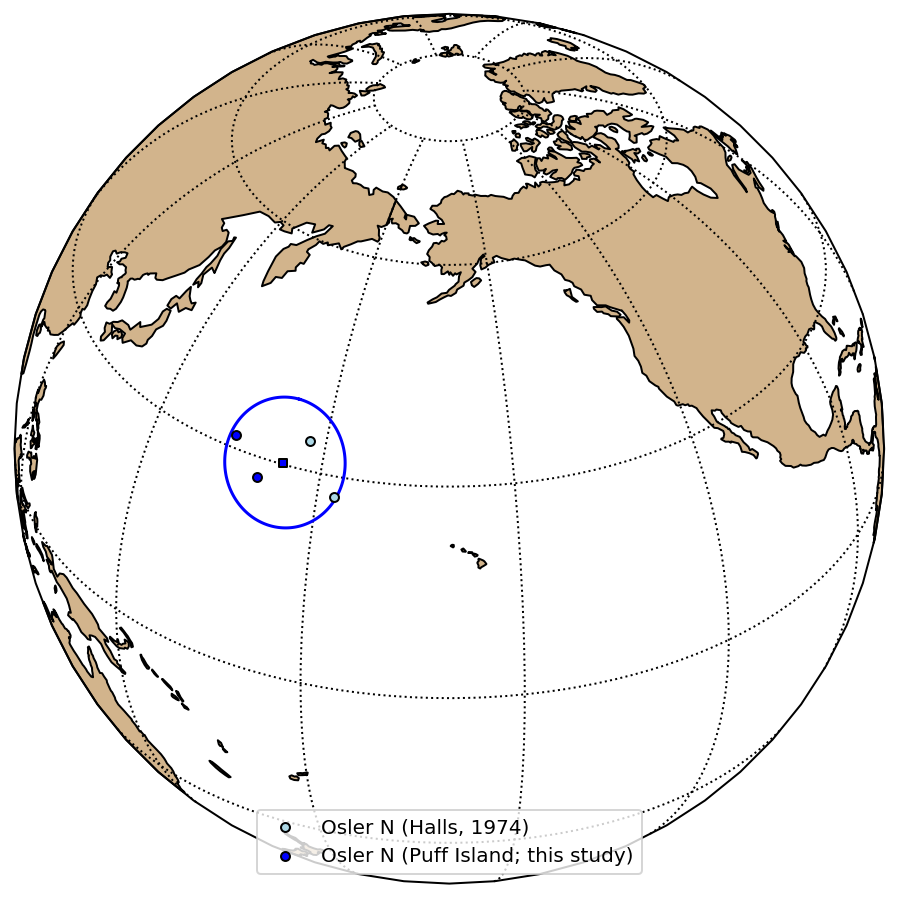

In [21]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,OslerN_Plong_Halls,OslerN_Plat_Halls,label='Osler N (Halls, 1974)',
                color='lightblue')
ipmag.plot_vgp(m,new_Osler_sites_Puff['vgp_lon'].tolist(),
               new_Osler_sites_Puff['vgp_lat'].tolist(),label='Osler N (Puff Island; this study)',
                color='blue')
ipmag.plot_pole(m,OslerN_pole['dec'],OslerN_pole['inc'],
                OslerN_pole['alpha95'],marker='s',color='Blue')
plt.legend(loc=8)
plt.show()

In [22]:
pole_means.loc['Osler_N'] = pd.Series({'PoleName' : 'Osler normal',
                                        'SLat' : 48.64,
                                        'SLon' : 271.91,
                                        'PLat' : round(OslerN_pole['inc'],1),
                                        'PLon' : round(OslerN_pole['dec'],1),
                                        'A95' : round(OslerN_pole['alpha95'],1),
                                        'K' : round(OslerN_pole['k'],1),
                                        'N' : int(OslerN_pole['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Halls, 1974; this study',
                                        'AgeNominal' : 1095,
                                        'AgeLower' : 1080,
                                        'AgeUpper' : 1100,
                                        'AgeInfo' : 'Poorly known, significantly younger than the ca. 1105 Ma Agate Point Rhyolite date, pole position similiar to Portage Lake normal-polarity zone poles and distinct from Flour Bay normal-polarity zone pole and therefore likely younger than 1100 Ma date in the Alona Bay reversed-polarity zone',
                                        'AgeRef' : '',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : 7,
                                        'color' : '#0000FF'})

### Combined Osler figure

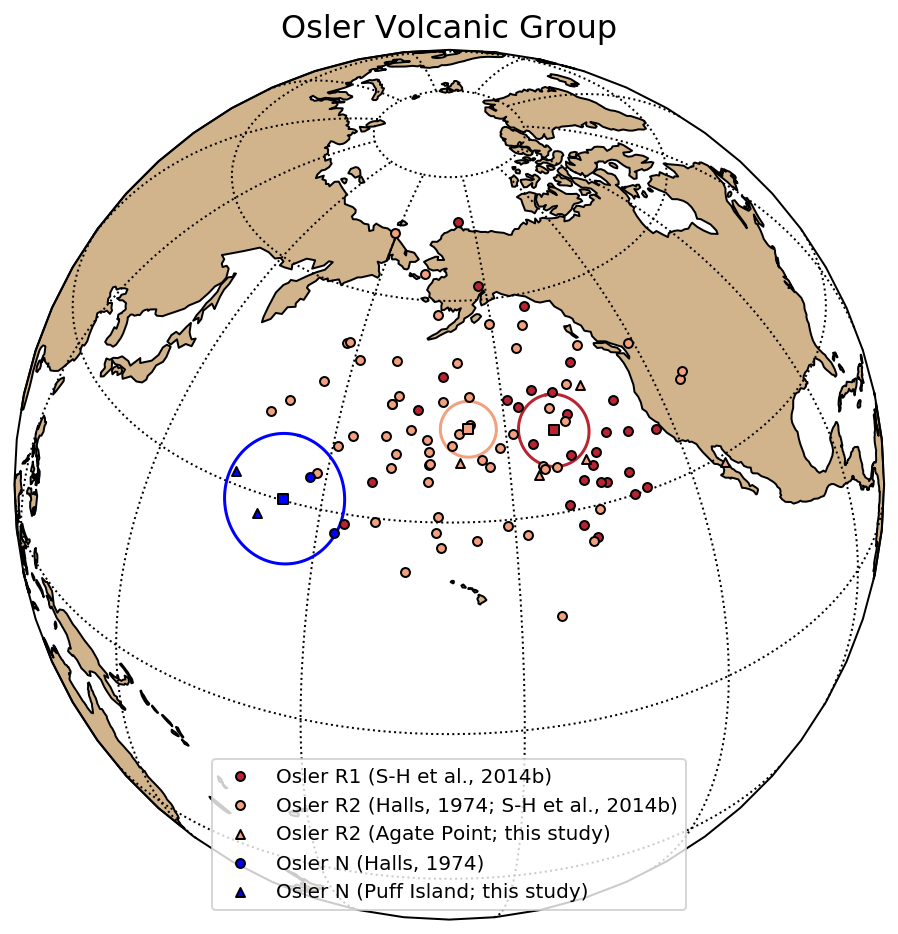

In [23]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,SH2014_OslerR_lower['vgp_lon'].tolist(),
               SH2014_OslerR_lower['vgp_lat'].tolist(),
               color=pole_means['color']['Osler_R1'],
               label='Osler R1 (S-H et al., 2014b)')
ipmag.plot_pole(m,pole_means['PLon']['Osler_R1'],
                pole_means['PLat']['Osler_R1'],
                pole_means['A95']['Osler_R1'],marker='s',
                color=pole_means['color']['Osler_R1'],
                markersize=30)

ipmag.plot_vgp(m,SH2014_OslerR_upper['vgp_lon'].tolist()+Halls1974_sites_r['vgp_lon'].tolist(),
               SH2014_OslerR_upper['vgp_lat'].tolist()+Halls1974_sites_r['vgp_lat'].tolist(),
               color=pole_means['color']['Osler_R2'],label='Osler R2 (Halls, 1974; S-H et al., 2014b)')
ipmag.plot_vgp(m,di_block=AgatePoint_OslerR_vgps,
               color=pole_means['color']['Osler_R2'],marker='^',
               label='Osler R2 (Agate Point; this study)')
ipmag.plot_pole(m,pole_means['PLon']['Osler_R2'],
                pole_means['PLat']['Osler_R2'],
                pole_means['A95']['Osler_R2'],marker='s',
                color=pole_means['color']['Osler_R2'],
                markersize=30)

ipmag.plot_vgp(m,OslerN_Plong_Halls,OslerN_Plat_Halls,
               label='Osler N (Halls, 1974)',
               color=pole_means['color']['Osler_N'])
ipmag.plot_vgp(m,new_Osler_sites_Puff['vgp_lon'].tolist(),
               new_Osler_sites_Puff['vgp_lat'].tolist(),
               label='Osler N (Puff Island; this study)',
               color=pole_means['color']['Osler_N'],marker='^')
ipmag.plot_pole(m,pole_means['PLon']['Osler_N'],
                pole_means['PLat']['Osler_N'],
                pole_means['A95']['Osler_N'],marker='s',
                color=pole_means['color']['Osler_N'],
                markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
#plt.legend(bbox_to_anchor=(0.85, 0.25))
plt.legend(loc=8)
plt.title('Osler Volcanic Group',fontsize=16)
#plt.savefig('./Plots/vgps_Osler.svg')
plt.show()

## Mamainse Point Volcanics

The succession of basalt flows at Mamainse Point, Ontario in the easternmost portion of the Lake Superior basin is interpretted to be the most time-complete record of extrusive volcanism in the Midcontinent Rift. Paleomagnetic data developed in stratigraphic context from the succession at Mamainse Point published in Swanson-Hysell et al. (2009) and Swanson-Hysell et al. (2014a) are imported below.

Swanson-Hysell, N. L., Maloof, A. C., Weiss, B. P., and Evans, D. A. D., 2009, No asymmetry in geomagnetic reversals recorded by 1.1-billion-year-old Keweenawan basalts: Nature Geoscience, vol. 2, pp. 713–717, doi:10.1038/ngeo622.

Swanson-Hysell, N. L., Burgess, S. D., Maloof, A. C., and Bowring, S. A., 2014a, Magmatic activity and plate motion during the latent stage of Midcontinent Rift development: Geology, vol. 42, pp. 475–478, doi:10.1130/G35271.1.

Link to MagIC contribution: https://earthref.org/MagIC/16333 or http://earthref.org/MAGIC/doi/10.1130/G35271.1

In [24]:
MP_sites = pd.read_csv('Swanson-Hysell2014a/sites.txt',sep='\t',header=1)

There are significant changes in pole position recorded in the succession at Mamainse Point. As a result, poles need to be calculated from subsets of the VGPs. These divisions are made by stratigraphic intervals as was done in Swanson-Hysell et al. (2009, 2014a) with four resulting poles:
- Mamainse Point lower R1 (the stratigraphically lowest 600 meters; older portion of the Alona Bay reversed-polarity zone)
- Mamainse Point lower R2 (flows between meters 1080 and 1301; the younger portion of the Alona Bay reversed-polarity zone)
- Mamainse Point lower N and upper R (flows within the Flour Bay normal-polarity zone and the Flour Bay reversed-polarity zone)
- Mamainse Point upper N (flows within the Portage Lake normal-polarity zone; all studied flows stratigraphically above the "Great Conglomerate")

### Mamainse Point lower R1 (lower Alona Bay reversed-polarity zone)

In [25]:
MP_sites_lowerR1 = MP_sites[MP_sites.height<600]
MP_sites_lowerR1['age'] = 1109 
MP_sites_lowerR1['age_low'] = 1106
MP_sites_lowerR1['age_high'] = 1112

MPlowerR1_mean = ipmag.fisher_mean(dec=MP_sites_lowerR1.vgp_lon.tolist(),
                                   inc=MP_sites_lowerR1.vgp_lat.tolist())
ipmag.print_pole_mean(MPlowerR1_mean)

Plon: 227.0  Plat: 49.5
Number of directions in mean (n): 24
Angular radius of 95% confidence (A_95): 5.3
Precision parameter (k) estimate: 31.7


### Mamainse Point lower R2 (upper Alona Bay reversed-polarity zone)

In [26]:
MP_sites_lowerR2 = MP_sites[(MP_sites.height > 1070) & (MP_sites.height < 1350)]
MP_sites_lowerR2['age'] = 1105 
MP_sites_lowerR2['age_low'] = 1100.4
MP_sites_lowerR2['age_high'] = 1109

MPlowerR2_mean = ipmag.fisher_mean(dec=MP_sites_lowerR2.vgp_lon.tolist(),
                                   inc=MP_sites_lowerR2.vgp_lat.tolist())
ipmag.print_pole_mean(MPlowerR2_mean)

Plon: 205.2  Plat: 37.5
Number of directions in mean (n): 14
Angular radius of 95% confidence (A_95): 4.5
Precision parameter (k) estimate: 78.6


### Mamainse Point lower N and upper R (Flour Bay normal and reversed polarity zones)

In [27]:
MP_sites_flourbay = MP_sites[((MP_sites.height > 1350) & (MP_sites.height < 1810)) | ((MP_sites.height > 1860) & (MP_sites.height < 2100))]
MP_sites_flourbay['age'] = 1100.36
MP_sites_flourbay['age_low'] = 1100.10
MP_sites_flourbay['age_high'] = 1100.61

In [28]:
MP_sites_lowerN = MP_sites[(MP_sites.height > 1350) & (MP_sites.height < 1810)]
MP_sites_upperR = MP_sites[(MP_sites.height > 1860) & (MP_sites.height < 2100)]
MPlower_N_upper_R_mean = ipmag.fisher_mean(dec=MP_sites_lowerN.vgp_lon.tolist()+MP_sites_upperR.vgp_lon.tolist(),
                                           inc=MP_sites_lowerN.vgp_lat.tolist()+MP_sites_upperR.vgp_lat.tolist())
ipmag.print_pole_mean(MPlower_N_upper_R_mean)

Plon: 189.7  Plat: 36.1
Number of directions in mean (n): 24
Angular radius of 95% confidence (A_95): 4.9
Precision parameter (k) estimate: 37.3


### Mamainse Point upper N (Portage Lake polarity zone)

*Note that two upper N poles are presented in Swanson-Hysell et al., 2014a. The other one doesn't include the uppermost portion of the stratigraphy (the MP306 section)*

In [29]:
MP_sites_upperN = MP_sites[MP_sites.height > 2400]
MP_sites_upperN['age'] = 1094
MP_sites_upperN['age_low'] = 1090
MP_sites_upperN['age_high'] = 1100

MPupperN_mean = ipmag.fisher_mean(dec=MP_sites_upperN.vgp_lon.tolist(),
                                   inc=MP_sites_upperN.vgp_lat.tolist())
ipmag.print_pole_mean(MPupperN_mean)

Plon: 183.2  Plat: 31.2
Number of directions in mean (n): 34
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 94.4


In [30]:
pole_means.loc['MP_lowerR1'] = pd.Series({'PoleName' : 'Mamainse lower reversed 1',
                                        'SLat' : round(MP_sites_lowerR1.lat[0],2),
                                        'SLon' : round(MP_sites_lowerR1.lon[0],2),
                                        'PLat' : round(MPlowerR1_mean['inc'],1),
                                        'PLon' : round(MPlowerR1_mean['dec'],1),
                                        'A95' : round(MPlowerR1_mean['alpha95'],1),
                                        'K' : round(MPlowerR1_mean['k'],1),
                                        'N' : int(MPlowerR1_mean['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell et al., 2014a',
                                        'AgeNominal' : 1109,
                                        'AgeLower' : 1106,
                                        'AgeUpper' : 1112,
                                        'AgeInfo' : 'Likely older than ca. 1105 Ma given distinct higher latitude pole position from Osler R1 and similar position to ca. 1107 Ma Siemens Creek Volcanic Pole',
                                        'AgeRef' : '',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '7',
                                        'color' : '#930E26'})

pole_means.loc['MP_lowerR2'] = pd.Series({'PoleName' : 'Mamainse lower reversed 2',
                                        'SLat' : round(MP_sites_lowerR2.lat.tolist()[0],2),
                                        'SLon' : round(MP_sites_lowerR2.lon.tolist()[0],2),
                                        'PLat' : round(MPlowerR2_mean['inc'],1),
                                        'PLon' : round(MPlowerR2_mean['dec'],1),
                                        'A95' : round(MPlowerR2_mean['alpha95'],1),
                                        'K' : round(MPlowerR2_mean['k'],1),
                                        'N' : int(MPlowerR2_mean['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell, 2014a',
                                        'AgeNominal' : 1105,
                                        'AgeLower' : 1100.4,
                                        'AgeUpper' : 1109,
                                        'AgeInfo' : 'Older than $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of 1100.4 Ma based on stratigraphic position; likely ca. 1105 Ma based on comparison with paleomagnetic data from the Osler Volcanic Group',
                                        'AgeRef' : 'Swanson-Hysell, 2014a',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '7',
                                        'color' : '#F8C1A6'})

pole_means.loc['MP_lowerNupperR'] = pd.Series({'PoleName' : 'Mamainse lower normal and upper reversed',
                                        'SLat' : round(MP_sites_upperR.lat.tolist()[0],2),
                                        'SLon' : round(MP_sites_upperR.lon.tolist()[0],2),
                                        'PLat' : round(MPlower_N_upper_R_mean['inc'],1),
                                        'PLon' : round(MPlower_N_upper_R_mean['dec'],1),
                                        'A95' : round(MPlower_N_upper_R_mean['alpha95'],1),
                                        'K' : round(MPlower_N_upper_R_mean['k'],1),
                                        'N' : int(MPlower_N_upper_R_mean['n']),
                                        'PolarityZone' : 'Flour Bay normal and reversed polarity zones',
                                        'PmagRef' : 'Swanson-Hysell, 2014a',
                                        'AgeNominal' : 1100.36,
                                        'AgeLower' : 1100.10,
                                        'AgeUpper' : 1100.61,
                                        'AgeInfo' : 'Age constrained by $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of 1100.36 $\pm$ 0.25 Ma on Flour Bay tuff',
                                        'AgeRef' : 'Swanson-Hysell, 2014a',
                                        'GaussianOrUniform' : 'gaussian',
                                        'Gaussian_2sigma' : 0.25,
                                        'Q' : '7',
                                        'color' : '#6A579A'})

pole_means.loc['MP_upperN'] = pd.Series({'PoleName' : 'Mamainse upper normal',
                                        'SLat' : round(MP_sites_upperN.lat.tolist()[0],2),
                                        'SLon' : round(MP_sites_upperN.lon.tolist()[0],2),
                                        'PLat' : round(MPupperN_mean['inc'],1),
                                        'PLon' : round(MPupperN_mean['dec'],1),
                                        'A95' : round(MPupperN_mean['alpha95'],1),
                                        'K' : round(MPupperN_mean['k'],1),
                                        'N' : int(MPupperN_mean['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Swanson-Hysell, 2014a',
                                        'AgeNominal' : 1094,
                                        'AgeLower' : 1090,
                                        'AgeUpper' : 1100,
                                        'AgeInfo' : 'Likely ca. 1094 Ma based on similar pole position to the Portage Lake Polarity Zone upper NE limb North Shore Volcanic Group poles',
                                        'AgeRef' : '',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '7',
                                        'color' : '#3B7185'})

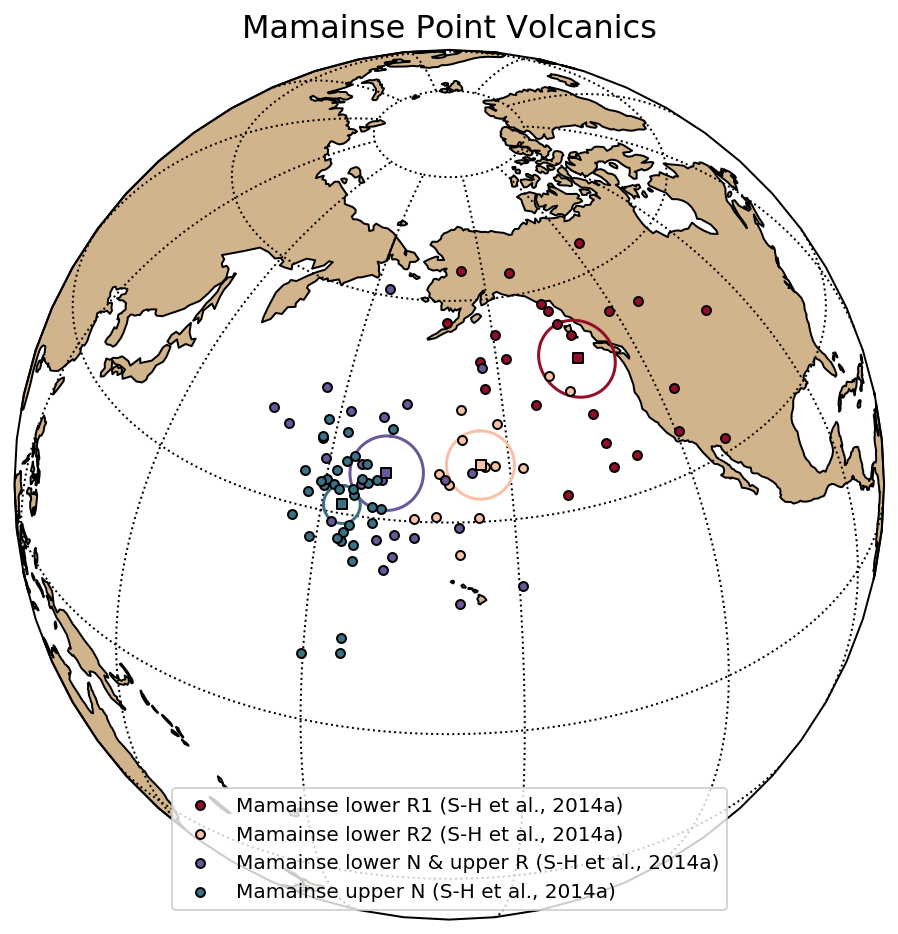

In [31]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,MP_sites_lowerR1['vgp_lon'].tolist(),
               MP_sites_lowerR1['vgp_lat'].tolist(),
               color=pole_means['color']['MP_lowerR1'],
               label='Mamainse lower R1 (S-H et al., 2014a)')
ipmag.plot_pole(m,pole_means['PLon']['MP_lowerR1'],
                pole_means['PLat']['MP_lowerR1'],
                pole_means['A95']['MP_lowerR1'],
                marker='s',color=pole_means['color']['MP_lowerR1'],
                edgecolor='k',markersize=30)

ipmag.plot_vgp(m,MP_sites_lowerR2['vgp_lon'].tolist(),
               MP_sites_lowerR2['vgp_lat'].tolist(),
               color=pole_means['color']['MP_lowerR2'],
               label='Mamainse lower R2 (S-H et al., 2014a)')
ipmag.plot_pole(m,pole_means['PLon']['MP_lowerR2'],
                pole_means['PLat']['MP_lowerR2'],
                pole_means['A95']['MP_lowerR2'],
                marker='s',color=pole_means['color']['MP_lowerR2'],
                edgecolor='k',markersize=30)

ipmag.plot_vgp(m,MP_sites_lowerN.vgp_lon.tolist()+MP_sites_upperR.vgp_lon.tolist(),
                 MP_sites_lowerN.vgp_lat.tolist()+MP_sites_upperR.vgp_lat.tolist(),
                 color=pole_means['color']['MP_lowerNupperR'],
               label='Mamainse lower N & upper R (S-H et al., 2014a)')
ipmag.plot_pole(m,pole_means['PLon']['MP_lowerNupperR'],
                pole_means['PLat']['MP_lowerNupperR'],
                pole_means['A95']['MP_lowerNupperR'],
                marker='s',color=pole_means['color']['MP_lowerNupperR'],
                edgecolor='k',markersize=30)

ipmag.plot_vgp(m,MP_sites_upperN['vgp_lon'].tolist(),
               MP_sites_upperN['vgp_lat'].tolist(),
               color=pole_means['color']['MP_upperN'],
               label='Mamainse upper N (S-H et al., 2014a)')
ipmag.plot_pole(m,pole_means['PLon']['MP_upperN'],
                pole_means['PLat']['MP_upperN'],
                pole_means['A95']['MP_upperN'],
                marker='s',color=pole_means['color']['MP_upperN'],
                edgecolor='k',markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
#plt.legend(bbox_to_anchor=(1, 0.25))
plt.legend(loc=8)
plt.title('Mamainse Point Volcanics',fontsize=16)
#plt.savefig('./Plots/vgps_Mamainse.svg')
plt.show()

## North Shore Volcanic Group and Schroeder-Lutsen Basalts

Tauxe and Kodama (2009) published data from sites of the North Shore Volcanic Group that was the first study of the North Shore Volcanic Group to publish data from these lava flows using modern methods. Books (1968, 1972) and Palmer (1970) also developed data that can largely be considered to be superseded by the Tauxe and Kodama results. However, we will consider some of the Books data from the Grand Portage basalts since only one of those flows was sampled by Tauxe and Kodama (2009) and the generally single component remanence of these lava flows makes it such that the single AF cleaning step methods of those researchers likely isolated robust site means. The Tauxe data can be unpacked from the MagIC contribution and be imported into a dataframe.

### Import Tauxe and Kodama (2009)

Tauxe, L. and Kodama, K., 2009, Paleosecular variation models for ancient times: Clues from Keweenawan lava flows: Physics of the Earth and Planetary Interiors, vol. 177, pp. 31–45, doi:10.1016/j.pepi.2009.07.006.

Link to MagIC contribution: http://earthref.org/MAGIC/doi/j.pepi.2009.07.006

In [32]:
NSVG_Data=pd.read_csv('Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)

#### Assign Tauxe and Kodama (2009) sites to lava sequences

There are a few sites from intrusive units within the Tauxe and Kodama (2009) data set. Sites ns027 and ns029 are from the Brule Lake Hovland Gabbro. ns025 is from the Monker River Diabase. ns041 is from the Stony Point Diabase. The focus here is on extrusive flows so let's split the data into groups related to the sequence of lava flows they are from using the terminology from Minnesota Geological Survey mapping (Duluth Complex overviewmap). The sequence codes are as follows:

- 'nnel' is the lower northeast sequence of the North Shore Volcanic Group
- 'nneu' is the upper northeast sequence of the North Shore Volcanic Group
- 'nswu' is the upper southwest sequence of the North Shore Volcanic Group
- 'nsl' is the Schroeder-Lutsen basalts above the North Shore Volcanic Group

These codes are assigned to the sites in the code cell below. 

In [33]:
nnel_site_list = ['ns024',
                  'ns026']
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nswu_site_list = ['ns034',
                  'ns035',
                  'ns036',
                  'ns037',
                  'ns038',
                  'ns039',
                  'ns040',
                  'ns042',
                  'ns043',
                  'ns044',
                  'ns045',
                  'ns046',
                  'ns047',
                  'ns048',
                  'ns049',
                  'ns050',
                  'ns051',
                  'ns052',
                  'ns053',
                  'ns054',
                  'ns055',
                  'ns056',
                  'ns057',
                  'ns058',
                  'ns059',
                  'ns060',
                  'ns061',
                  'ns062',
                  'ns063',
                  'ns064',
                  'ns065',
                  'ns066',
                  'ns067',
                  'ns068',
                  'ns071',
                  'ns072',
                  'ns073',
                  'ns074',
                  'ns075',
                  'ns077',
                  'ns078',
                  'ns079',
                  'ns080',
                  'ns081',
                  'ns083',
                  'ns085',
                  'ns087']
nsl_site_list = ['ns006',
                 'ns007',
                 'ns008',
                 'ns009',
                 'ns010',
                 'ns011',
                 'ns012',
                 'ns013',
                 'ns014',
                 'ns015']

nnel_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nnel_site_list)]
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
nswu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nswu_site_list)]
nsl_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nsl_site_list)]

### NSVG Southwest Sequence

In addition to assigning sequences, these sites can be divided into the lithostratigraphic units described in Green et al. 2011 that are used in maps of the Minnesota Geological Survey such as GEOLOGIC MAP OF THE DULUTH COMPLEX AND RELATED ROCKS, NORTHEASTERN MINNESOTA (Miller et al., 2001) as well as the more detailed quadrangles. The codes of those map are used here as follows.

- 'nlwb' is the Lakewood Basalts of the upper southwest sequence
- 'nsrb' is the Sucker River Basalts of the upper southwest sequence
- 'nlmb' is the Larsmont Basalts of the upper southwest sequence 
- 'nthb' is the Two Harbors Basalts of the upper southwest sequence

*Note that there are no sites from Tauxe and Kodama (2009) within the following lithostratigraphic units of the upper Southwest Sequence: Leif Erickson Park lavas, Lakeside lavas, Gooseberry River Basalts, Belmore Bay lavas.*

- 'ngpb' is the Grand Portage Basalts of the lower northeast sequence
- 'ndba' is the Deronda Bay Andesite of the lower northeast sequence
- 'nmil' is the Marr Island Lavas of the upper northeast sequence
- 'nkcr' is the Kimball Creek felsites of the upper northeast sequence
- 'nrcb' is the Red Cliff basalts of the upper northeast sequence
- 'ncvb' is the Croftville basalts of the upper northeast sequence
- 'nbwb' is the Breakwater basalts of the upper northeast sequence
- 'ngha' is the Good Harbor Bay andesites of the upper northeast sequence
- 'ntpb' is the Terrace Point basalt flow of the upper northeast sequence
- 'norl'is the Onion River lavas of the upper northeast sequence

In [34]:
nneu_nlwb_sites = ['ns053',
                   'ns055',
                   'ns057',
                   'ns060',
                   'ns061',
                   'ns062',
                   'ns063',
                   'ns064',
                   'ns065',
                   'ns066',
                   'ns067',
                   'ns068',
                   'ns071',
                   'ns072',
                   'ns073',
                   'ns074',
                   'ns075',
                   'ns077',
                   'ns078',
                   'ns079',
                   'ns080',
                   'ns081',
                   'ns083',
                   'ns085',
                   'ns087']
        
nswu_nsrb_sites =  ['ns040',
                    'ns042',
                    'ns043',
                    'ns044',
                    'ns045',
                    'ns046',
                    'ns047',
                    'ns048',
                    'ns049',
                    'ns050',
                    'ns051',
                    'ns052',
                    'ns054',
                    'ns056',
                    'ns058',
                    'ns059']

nswu_nlmb_sites = ['ns038',
                   'ns039']

nswu_nthb_sites = ['ns034',
                   'ns035',
                   'ns036',
                   'ns037']

#Brule_Lake_Hovland_Gabbro
bhrd = ['ns027']
nnel_ngpb_sites = ['ns024']
nnel_ndba_sites = ['ns026']
nneu_nmil_sites = ['ns030']
nneu_nkcr_sites = ['ns022']
nneu_nrcb_sites = ['ns020',
                   'ns023',
                   'ns018',
                   'ns021']
nneu_ncvb_sites = ['ns031',
                   'ns028']
nneu_nbwb_sites = ['ns016',
                   'ns019']
nneu_ngha_sites = ['ns003',
                   'ns002',
                   'ns004',
                   'ns032']
nneu_ntpb_sites = ['ns005']

### Import Books (1968)

The study of Books (1968) developed data from the Powder Mill Group and the Grand Portage Basalts. In this compilation, we have developed a MagIC database contribution for the Books (1968) data. The VGPs were not reported in the study. The code below imports a version of the MagIC contribution without the VGPs and calculates the VGPs using the ipmag.vgpcalc() function. These calculated VGPs were added to the Books (1968) dataset and included in the MagIC contribution that we uploaded.

Books, K., 1968, Magnetization of the lowermost Keweenawan lava flows in the Lake Superior area, Geological Survey research 1968, chapter D: U.S. Geological Survey Professional Paper, vol. P 0600-D, pp. 248–254.

Link to MagIC contribution: http://earthref.org/MagIC/11860

In [35]:
Books1968 = pd.read_csv('Books1968/Books1968.txt',sep='\t',skiprows=10)
ipmag.vgp_calc(Books1968,site_lon='lon',site_lat='lat',
               dec_tc='dir_dec',inc_tc='dir_inc')
Books1968.vgp_lat = Books1968.vgp_lat_rev
Books1968.vgp_lon = Books1968.vgp_lon_rev
#Books1968.to_csv('../Data_Compiled/Books1968/Books1968_vgps.csv')

In [36]:
Books1968_sites = pd.read_csv('Books1968/sites.txt',sep='\t',header=1)
Books1968_ngpb_sites = Books1968_sites[Books1968_sites.location == 'Grand Portage']

### Import Books (1972)

The study of Books (1972) developed data from throughout the Lake Superior region including the upper northeast sequence of the North Shore Volcanic Group.

Books, K., 1972, Paleomagnetism of some Lake Superior Keweenawan rocks: U.S. Geological Survey Professional Paper, vol. P 0760, p. 42.

In [37]:
Books1972_sites = pd.read_csv('Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']

The Books 1972 sites can be divided by lithostratigraphic unit using the same codes as above.

In [38]:
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
#Note that the Terrace Point Basalt is a single flow
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nsl_sites_B72 = ['NS264',
                 'NS257',
                 'NS258',
                 'NS259',
                 'NS260',
                 'NS261',
                 'NS262',
                 'NS263',
                 'NS256',
                 'NS255',
                 'NS254',
                 'NS379',
                 'NS380',
                 'NS381',
                 'NS382']

nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nsl_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nsl_sites_B72)]

Given that the Terrace Point Basalt is a single flow and that Tauxe and Kodama (2009) also developed data from this flow, these data are not included in the upper Northeast sequence sites.

### Import Fairchild et al. (2017)

Fairchild et al. (2017) developed data from Schroeder-Lutsen Basalt flows along the Two Island River in northern Minnesota that can be combined with data from Tauxe and Kodama (2009) in order to develop a pole for the Schroeder-Lutsen Basalts. This study also developed data for the Michipicoten Island Formation which are used below.

Fairchild, L. M., Swanson-Hysell, N. L., Ramezani, J., Sprain, C. J., and Bowring, S. A., 2017, The end of Midcontinent Rift magmatism and the paleogeography of Laurentia: Lithosphere, vol. 9, pp. 117–133, doi:10.1130/L580.1.

Link to MagIC contribution: http://earthref.org/MAGIC/doi/10.1130/L580.1

In [39]:
Fairchild2017_sites = pd.read_csv('Fairchild2017/sites.txt',sep='\t',header=1)

In [40]:
Fairchild2017_SLB = Fairchild2017_sites[Fairchild2017_sites['location'] == 'Two Island River']
Fairchild2017_SLB = Fairchild2017_SLB[Fairchild2017_SLB['dir_comp_name'] == 'mag']
Fairchild2017_SLB = Fairchild2017_SLB[Fairchild2017_SLB['dir_tilt_correction'] == 100.0]

### North Shore Volcanic Group northeast limb poles

#### Grand Portage Basalts Pole

The Grand Portage Basalts are reversed polarity lava flows in the lower portion of the lower northeast sequence of the North Shore Volcanic Group and are stratigraphically below the Red Rock Rhyolite. The Tauxe and Kodama (2009) data include one flow from the Grand Portage Basalts (ns024) and data from the overlying Deronda Bay Andesite (ns026) that is the flow below the  Red Rock Rhyolite and will be included here in the Grand Portage mean. Data from these flows are combined with the Grand Portage Basalt data from the Books (1968) study.

We have developed a new U-Pb date from the Red Rock Rhyolite which provides an age of 1105.60 +/- 0.32 Ma. This age provides a minimum age constraint on the pole and it is likely close to the absolute pole age. 

In [41]:
Grand_portage_basalts = pd.concat([Books1968_ngpb_sites, nnel_data])
Grand_portage_basalts['age'] = 1106
Grand_portage_basalts['age_low'] = 1105.28
Grand_portage_basalts['age_high'] = 1108

In [42]:
Books1968_vgps = ipmag.make_di_block(Books1968_ngpb_sites.vgp_lon.tolist(),
                                     Books1968_ngpb_sites.vgp_lat.tolist())
NSVG_nnel_vgps_r = ipmag.make_di_block(nnel_data.vgp_lon.tolist(),
                                     nnel_data.vgp_lat.tolist())
NSVG_nnel_vgps = ipmag.do_flip(di_block=NSVG_nnel_vgps_r)
Grand_Portage_vgps = Books1968_vgps + NSVG_nnel_vgps
Grand_Portage_mean=pmag.fisher_mean(Grand_Portage_vgps)
ipmag.print_pole_mean(Grand_Portage_mean)

Plon: 201.7  Plat: 46.0
Number of directions in mean (n): 13
Angular radius of 95% confidence (A_95): 6.8
Precision parameter (k) estimate: 38.3


In [43]:
pole_means.loc['Grand Portage Basalts'] = pd.Series({'PoleName' : 'Grand Portage Basalts',
                                        'SLat' : 47.93,
                                        'SLon' : 270.28,
                                        'PLat' : round(Grand_Portage_mean['inc'],1),
                                        'PLon' : round(Grand_Portage_mean['dec'],1),
                                        'A95' : round(Grand_Portage_mean['alpha95'],1),
                                        'K' : round(Grand_Portage_mean['k'],1),
                                        'N' : int(Grand_Portage_mean['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Books, 1968; Tauxe and Kodama, 2009',
                                        'AgeNominal' : 1106,
                                        'AgeLower' : 1105.28,
                                        'AgeUpper' : 1108,
                                        'AgeInfo' : 'Close to, but slightly older than, $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U 1105.60 $\pm$ 0.32 Ma based on date from Red Rock Rhyolite',
                                        'AgeRef' : 'this study',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '5',
                                        'color' : '#E0785F'})

#### North Shore Volcanic Group upper northeast limb pole

In [44]:
NSVG_nneu = pd.concat([nneu_data_B72, nneu_data])
NSVG_nneu['age'] = 1095
NSVG_nneu['age_low'] = 1092
NSVG_nneu['age_high'] = 1098

In [45]:
nneu_combined_vgp_lon = nneu_data_B72.vgp_lon.tolist() + nneu_data.vgp_lon.tolist()
nneu_combined_vgp_lat = nneu_data_B72.vgp_lat.tolist() + nneu_data.vgp_lat.tolist()


nneu_VGPs = ipmag.make_di_block(nneu_combined_vgp_lon,
                                nneu_combined_vgp_lat)
nneu_mean=pmag.fisher_mean(nneu_VGPs)
ipmag.print_pole_mean(nneu_mean)

Plon: 181.7  Plat: 31.1
Number of directions in mean (n): 28
Angular radius of 95% confidence (A_95): 4.2
Precision parameter (k) estimate: 42.2


In [46]:
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()


nneu_dirs = ipmag.make_di_block(nneu_combined_dir_dec,
                                nneu_combined_dir_inc)
nneu_mean=pmag.fisher_mean(nneu_dirs)
ipmag.print_direction_mean(nneu_mean)

Dec: 291.3  Inc: 40.3
Number of directions in mean (n): 28
Angular radius of 95% confidence (a_95): 4.9
Precision parameter (k) estimate: 32.1


In [47]:
pole_means.loc['NSVG_nneu'] = pd.Series({'PoleName' : 'North Shore Volcanic Group (upper NE sequence)',
                                        'SLat' : round(nneu_data_B72.lat.tolist()[0],2),
                                        'SLon' : 360+round(nneu_data_B72.lon.tolist()[0],2),
                                        'PLat' : round(nneu_mean['inc'],1),
                                        'PLon' : round(nneu_mean['dec'],1),
                                        'A95' : round(nneu_mean['alpha95'],1),
                                        'K' : round(nneu_mean['k'],1),
                                        'N' : int(nneu_mean['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Books, 1972; Tauxe and Kodama, 2009',
                                        'AgeNominal' : 1095,
                                        'AgeLower' : 1092,
                                        'AgeUpper' : 1098,
                                        'AgeInfo' : "Younger than the the Devil's Kettle Rhyolite $^{\mathrm{207}}$Pb/$^{\mathrm{206}}$Pb date of 1097.7 $\pm$ 2.2 Ma, the new $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U 1093.38 $\pm$ 0.55 Ma date from the Grand Marais Rhyolite is near the top of the sequence with paleomagnetic data",
                                        'AgeRef' : 'Davis and Green, 1997; Fairchild et al., 2017',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '6',
                                        'color' : '#35474E'})

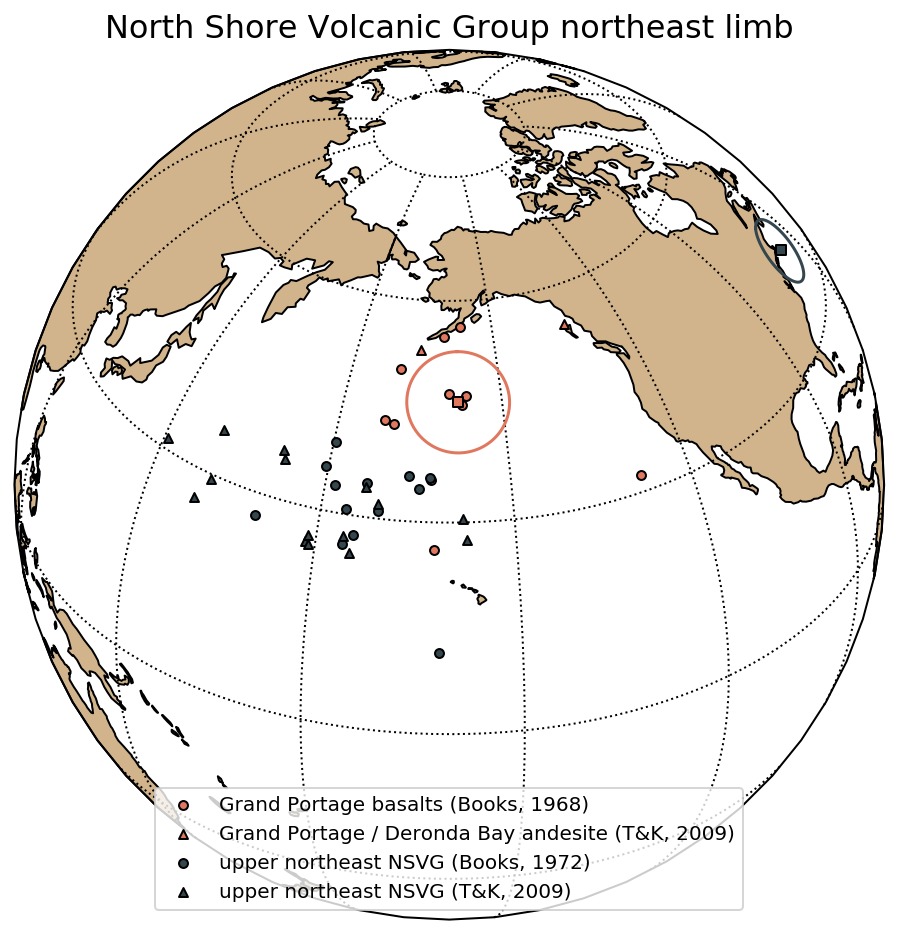

In [48]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,Books1968_ngpb_sites.vgp_lon.tolist(),
               Books1968_ngpb_sites.vgp_lat.tolist(),
               color=pole_means['color']['Grand Portage Basalts'],marker='o',
               label='Grand Portage basalts (Books, 1968)')
ipmag.plot_vgp(m,di_block=NSVG_nnel_vgps,
               color=pole_means['color']['Grand Portage Basalts'],marker='^',
               label='Grand Portage / Deronda Bay andesite (T&K, 2009)')
ipmag.plot_pole(m,pole_means['PLon']['Grand Portage Basalts'],
               pole_means['PLat']['Grand Portage Basalts'],
               pole_means['A95']['Grand Portage Basalts'],
               marker='s',color=pole_means['color']['Grand Portage Basalts'],
               edgecolor='k',markersize=30)

ipmag.plot_vgp(m,nneu_data_B72.vgp_lon.tolist(),
               nneu_data_B72.vgp_lat.tolist(),
               color=pole_means['color']['NSVG_nneu'],marker='o',
               label='upper northeast NSVG (Books, 1972)')
ipmag.plot_vgp(m,nneu_data.vgp_lon.tolist(),
               nneu_data.vgp_lat.tolist(),
               color=pole_means['color']['NSVG_nneu'],marker='^',
               label='upper northeast NSVG (T&K, 2009)')
ipmag.plot_pole(m,pole_means['PLon']['NSVG_nneu'],
               pole_means['PLat']['NSVG_nneu'],
               pole_means['A95']['NSVG_nneu'],
               marker='s',color=pole_means['color']['NSVG_nneu'],
               edgecolor='k',markersize=30)

plt.title('North Shore Volcanic Group northeast limb',fontsize=16)
# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
#plt.legend(bbox_to_anchor=(1.05, 0.25))
plt.legend(loc=8)
#plt.savefig('./Plots/vgps_NSVG_NE.svg')
plt.show()

### North Shore Volcanic Group southwest limb pole

#### Import new Gooseberry Basalts data

In [49]:
GB_Data = pd.read_csv('Swanson-Hysell2019a/Gooseberry/sites.txt',sep='\t',skiprows=1)
GB_Data_tc = GB_Data[GB_Data['dir_tilt_correction'] == 100.0]
GB_Data_HT = GB_Data[GB_Data['dir_comp_name'] == 'HT']
GB_Data_HT = GB_Data_HT[GB_Data_HT['dir_tilt_correction'] == 100.0]

In [50]:
GB_Data_HT_filtered = GB_Data_HT[GB_Data_HT.site != 'GB5']

Plon: 174.9  Plat: 38.4
Number of directions in mean (n): 31
Angular radius of 95% confidence (A_95): 2.3
Precision parameter (k) estimate: 125.8


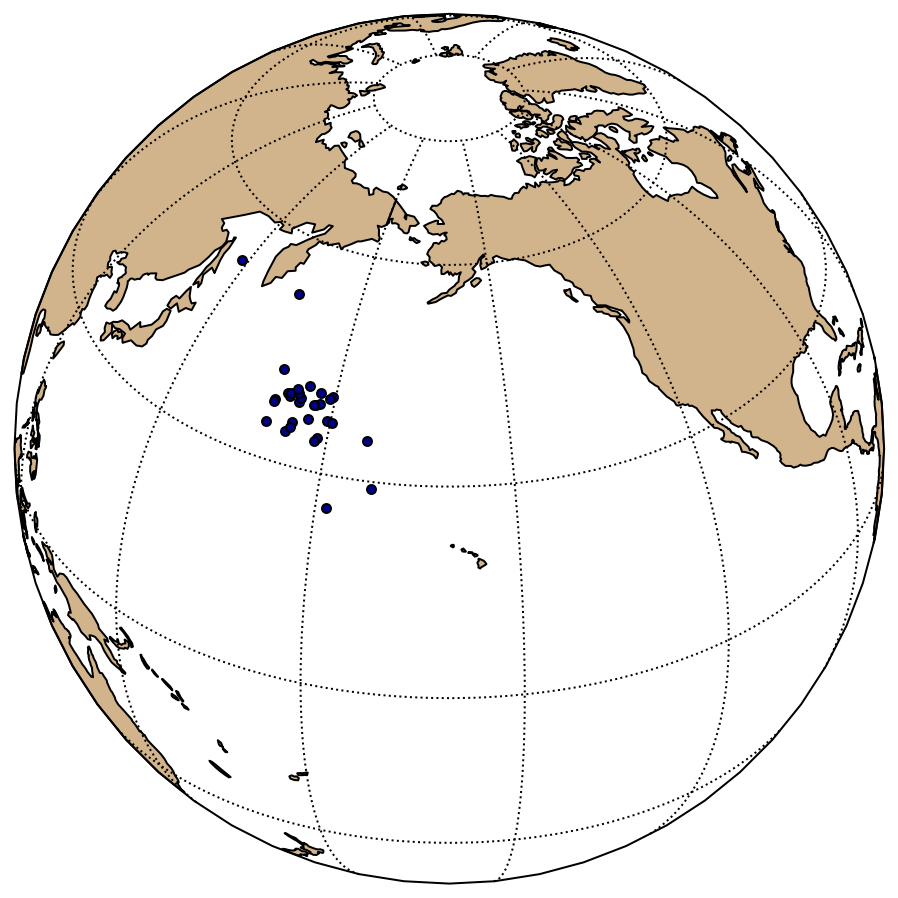

In [51]:
GB_mean_pole = ipmag.fisher_mean(GB_Data_HT_filtered['vgp_lon'].tolist(),GB_Data_HT_filtered['vgp_lat'].tolist())
ipmag.print_pole_mean(GB_mean_pole)

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
ipmag.plot_vgp(m,GB_Data_HT_filtered['vgp_lon'].tolist(),GB_Data_HT_filtered['vgp_lat'].tolist(),
               color='DarkBlue',label='Gooseberry VGPs')

#### Combine data for North Shore Volcanic Group upper southwest limb pole

The North Shore Volcanic Group (NSVG) is comprised of two main limbs with distinct stratigraphy and radiometric age control. The southwest limb of the NSVG ('nswu') was particularly well-sampled by Tauxe and Kodama (2009) and we now add data from 31 additional flows of the Gooseberry Basalts. All of these sites can be bracketed with U-Pb dates from the Lakewood icelandite and the Palisade rhyolite.

In [52]:
NSVG_nswu = pd.concat([nswu_data, GB_Data_HT_filtered])
NSVG_nswu['age'] = 1096.18
NSVG_nswu['age_low'] = 1093.94
NSVG_nswu['age_high'] = 1096.75

In [53]:
nswu_vgp_lons = nswu_data.vgp_lon.tolist() + GB_Data_HT_filtered.vgp_lon.tolist()
nswu_vgp_lats = nswu_data.vgp_lat.tolist() + GB_Data_HT_filtered.vgp_lat.tolist()

nswu_VGPs = ipmag.make_di_block(nswu_vgp_lons,nswu_vgp_lats)
nswu_mean=pmag.fisher_mean(nswu_VGPs)
ipmag.print_pole_mean(nswu_mean)

Plon: 179.3  Plat: 36.9
Number of directions in mean (n): 78
Angular radius of 95% confidence (A_95): 2.1
Precision parameter (k) estimate: 56.8


In [54]:
pole_means.loc['NSVG_nswu'] = pd.Series({'PoleName' : 'North Shore Volcanic Group (upper SW sequence)',
                                        'SLat' : round(GB_Data_HT.lat.tolist()[0],2),
                                        'SLon' : round((360+GB_Data_HT.lon.tolist()[0]),2),
                                        'PLat' : round(nswu_mean['inc'],1),
                                        'PLon' : round(nswu_mean['dec'],1),
                                        'A95' : round(nswu_mean['alpha95'],1),
                                        'K' : round(nswu_mean['k'],1),
                                        'N' : int(nswu_mean['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Tauxe and Kodama, 2009; this study',
                                        'AgeNominal' : 1096.18,
                                        'AgeLower' : 1093.94,
                                        'AgeUpper' : 1096.75,
                                        'AgeInfo' : '$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date on 40th Ave. Icelandite (1096.75 $\pm$ 0.28) provides a lower bound, the $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date on the Two Harbors Icelandite is within the sequence (1096.18 $\pm$ 0.32) and the Palisade Rhyolite (1093.94 $\pm$ 0.28) provides an upper bound',
                                        'AgeRef' : 'this study',
                                        'GaussianOrUniform' : 'gaussian',
                                        'Gaussian_2sigma' : round(((1096.18-1093.94)/2),2),
                                        'Q' : '6',
                                        'color' : '#154F8D'})

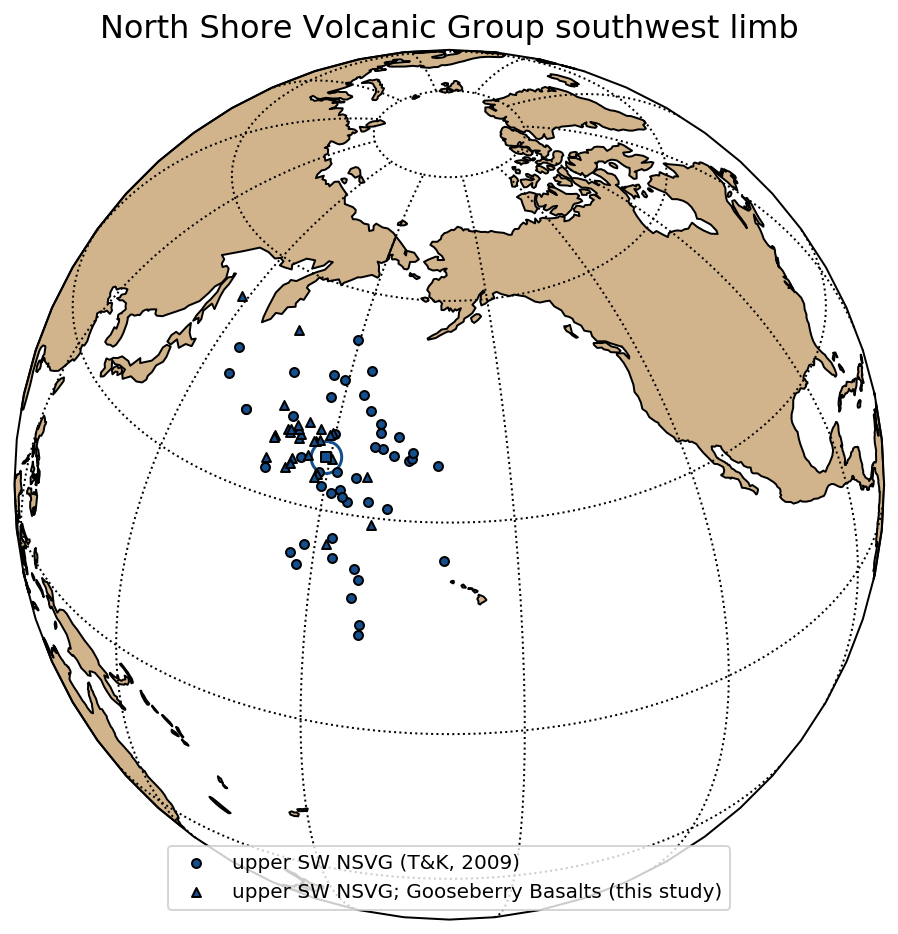

In [55]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,nswu_data['vgp_lon'].tolist(),nswu_data['vgp_lat'].tolist(),
               color=pole_means['color']['NSVG_nswu'],label='upper SW NSVG (T&K, 2009)')
ipmag.plot_vgp(m,GB_Data_HT_filtered['vgp_lon'].tolist(),
               GB_Data_HT_filtered['vgp_lat'].tolist(),
               color=pole_means['color']['NSVG_nswu'],marker='^',
               label='upper SW NSVG; Gooseberry Basalts (this study)')
ipmag.plot_pole(m,pole_means['PLon']['NSVG_nswu'],
                pole_means['PLat']['NSVG_nswu'],
                pole_means['A95']['NSVG_nswu'],
                marker='s',color=pole_means['color']['NSVG_nswu'],
                edgecolor='k',markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
#plt.legend(bbox_to_anchor=(1.0, 0.25))
plt.legend(loc=8)
plt.title('North Shore Volcanic Group southwest limb',fontsize=16)
#plt.savefig('./Plots/vgps_NSVG_SW.svg')
plt.show()

###  Schroeder Lutsen Basalts

The pole published for the Schroeder-Lutsen Basalts in Fairchild et al., 2017 combined data from 40 new sites with data from 10 sites within the basalts developed by Tauxe and Kodama (2009).

In [56]:
SLB = pd.concat([nsl_data, Fairchild2017_SLB, nsl_data_B72])
SLB['age'] = 1090
SLB['age_low'] = 1085
SLB['age_high'] = 1091.5

In [57]:
combined_SLB_lon = nsl_data['vgp_lon'].tolist() + Fairchild2017_SLB['vgp_lon'].tolist()
combined_SLB_lat = nsl_data['vgp_lat'].tolist() + Fairchild2017_SLB['vgp_lat'].tolist()
SLB_pole = ipmag.fisher_mean(combined_SLB_lon,combined_SLB_lat)
ipmag.print_pole_mean(SLB_pole)

Plon: 188.0  Plat: 26.9
Number of directions in mean (n): 50
Angular radius of 95% confidence (A_95): 3.0
Precision parameter (k) estimate: 45.4


In addition to the sites in the pole above, sites were developed by Books (1972) from the Schroeder-Lutsen Basalts that can be added to the pole.

In [58]:
combined_SLB_lon_new = nsl_data['vgp_lon'].tolist() + Fairchild2017_SLB['vgp_lon'].tolist() + nsl_data_B72['vgp_lon'].tolist()
combined_SLB_lat_new = nsl_data['vgp_lat'].tolist() + Fairchild2017_SLB['vgp_lat'].tolist() + nsl_data_B72['vgp_lat'].tolist()
SLB_pole_new = ipmag.fisher_mean(combined_SLB_lon_new,combined_SLB_lat_new)
ipmag.print_pole_mean(SLB_pole_new)

Plon: 187.6  Plat: 28.3
Number of directions in mean (n): 65
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 50.5


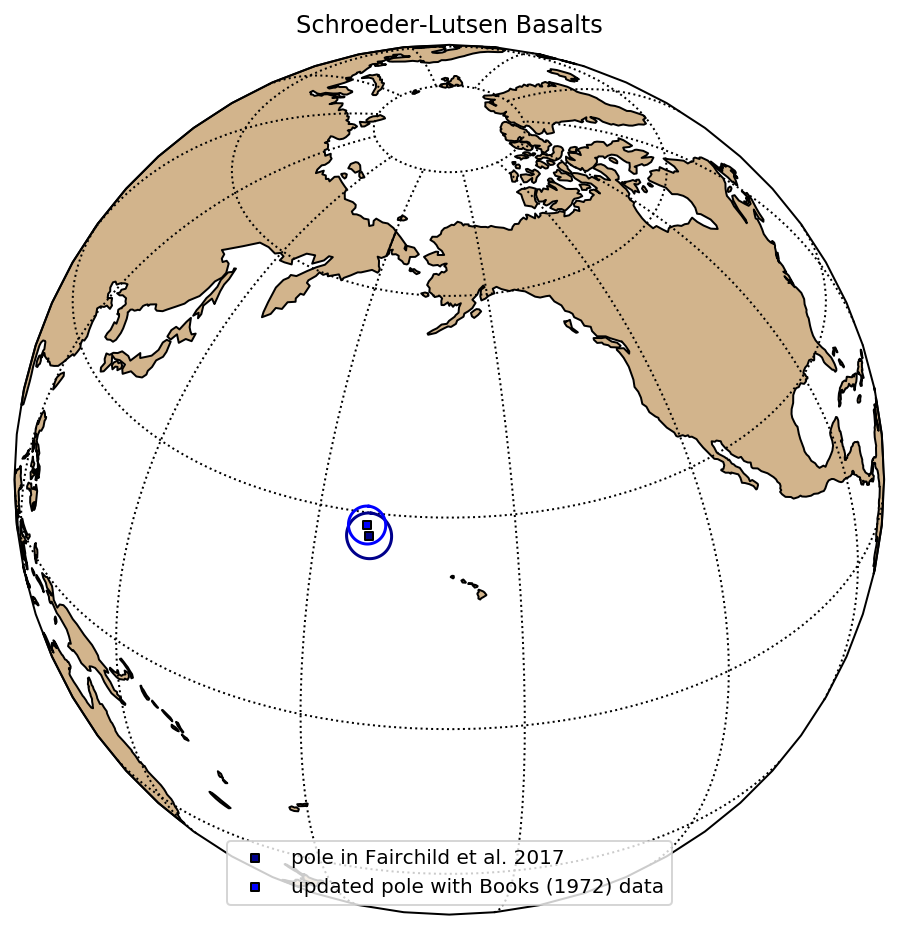

In [59]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_pole(m,SLB_pole['dec'],
                SLB_pole['inc'],
                SLB_pole['alpha95'],
                marker='s',color='DarkBlue',
                label='pole in Fairchild et al. 2017')
ipmag.plot_pole(m,SLB_pole_new['dec'],
                SLB_pole_new['inc'],
                SLB_pole_new['alpha95'],
                marker='s',color='Blue',
                label='updated pole with Books (1972) data')
# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.legend(loc=8)
plt.title('Schroeder-Lutsen Basalts')
plt.show()

In [60]:
pole_means.loc['SLB'] = pd.Series({'PoleName' : 'Schroeder Lutsen Basalts',
                                        'SLat' : 47.54,
                                        'SLon' : 269.10,
                                        'PLat' : round(SLB_pole_new['inc'],1),
                                        'PLon' : round(SLB_pole_new['dec'],1),
                                        'A95' : round(SLB_pole_new['alpha95'],1),
                                        'K' : round(SLB_pole_new['k'],1),
                                        'N' : int(SLB_pole_new['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Books, 1972; Tauxe and Kodama, 2009; Fairchild et al., 2017',
                                        'AgeNominal' : 1090,
                                        'AgeLower' : 1085,
                                        'AgeUpper' : 1091.5,
                                        'AgeInfo' : '$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date of of 1091.48 $\pm$ 0.21 Ma on Beaver Bay Complex aplite provides maximum age constraint',
                                        'AgeRef' : 'Fairchild et al., 2017',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '6',
                                        'color' : '#8DC2DC'})

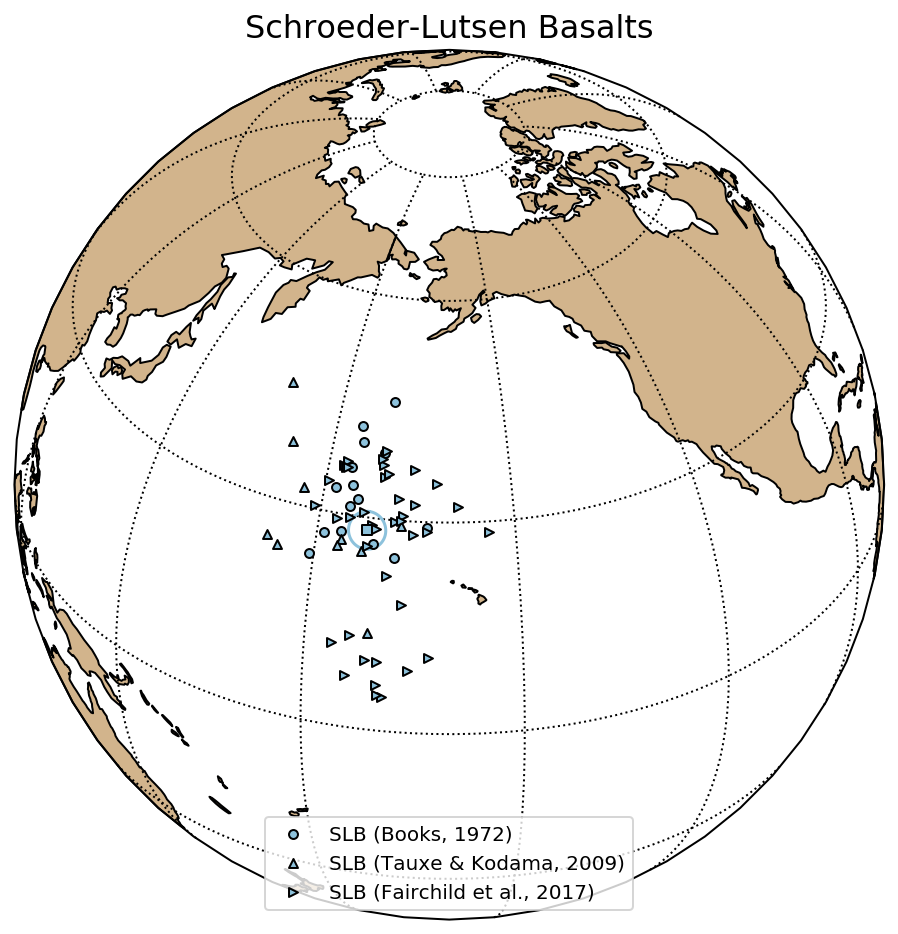

In [61]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,nsl_data_B72['vgp_lon'].tolist(),nsl_data_B72['vgp_lat'].tolist(),
               color=pole_means['color']['SLB'],marker='o',label='SLB (Books, 1972)')
ipmag.plot_vgp(m,nsl_data['vgp_lon'].tolist(),nsl_data['vgp_lat'].tolist(),
               color=pole_means['color']['SLB'],marker='^',label='SLB (Tauxe & Kodama, 2009)')
ipmag.plot_vgp(m,Fairchild2017_SLB['vgp_lon'].tolist(),Fairchild2017_SLB['vgp_lat'].tolist(),
               color=pole_means['color']['SLB'],marker='>',label='SLB (Fairchild et al., 2017)')
ipmag.plot_pole(m,pole_means['PLon']['SLB'],
                pole_means['PLat']['SLB'],
                pole_means['A95']['SLB'],
                marker='s',color=pole_means['color']['SLB'],
                edgecolor='k',markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.legend(loc=8)
plt.title('Schroeder-Lutsen Basalts',fontsize=16)
#plt.savefig('./Plots/vgps_SLB.svg')
plt.show()

## Portage Lake Volcanics and Lake Shore Traps

Books (1972) and Hnat et al. (2006) published paleomagnetic data from the lava flows of the Portage Lake Volcanics. We seek to calculate a pole from these data that are constrained by our new dates from the Copper City Flow and the Greenstone Flow. These stratigraphic position of the sites needs to be considered in order to select such sites. Additionally, flows such as the Greenstone Flow were sampled repeatedly by Books (1972) and Hnat et al. (2006). Such data need to be combined such that data from an individual cooling units are not considered as multiple sites for the calculation of the poel.  

### Books (1972) data

The data from Books (1972) was unpacked from the MagIC database file above and below the data from the Portage Lake Volcanics are extracted from that site level data.

In [62]:
Books1972_PLV_sites = Books1972_sites[Books1972_sites.formation == 'Portage Lake Volcanics']

### Import Hnat et al. (2006)

The data from Hnat et al. (2006) can be unpacked from the MagIC database file.

Hnat, J. S., van der Pluijm, B. A., and Van der Voo, R., 2006, Primary curvature in the Mid-Continent Rift: Paleomagnetism of the Portage Lake Volcanics (northern Michigan, USA): Tectonophysics, vol. 425, pp. 71–82, doi:10.1016/j.tecto.2006.07.006.

Link to MagIC contribution: http://earthref.org/MAGIC/doi/10.1016/j.tecto.2006.07.006

In [63]:
Hnat2006_sites = pd.read_csv('Hnat2006/sites.txt',sep='\t',header=1)

In [64]:
#Flows between CC and GS inclusive of the CC flow
PLV_CCtoGS = ['PL343',
              'PL61',
              'PL325',
              'PL60',
              'PL58',
              'PL57',
              'PL60',
              'PL327',
              'PL326',
              'PL56',
              'PL55',
              'PL324',
              'PL53',
              'PL323',
              'PL52',
              'PL330',
              'PL51',
              'PL344',
              'PL331',
              'PL50',
              'PL150',
              'PL1',
              'PL3',
              'PL6',
              'PL5',
              'PL4',
              'PL7',
              'PL35',
              'PL158',
              'PL160',
              'PL159',
              'PL157'
              'PL154',
              'PL153']
        
              
#Kearsarge Flow is between CC and GS and has two books sites within it
PLV_Kearsarge = ['PL54',
                 'PL335']

#Scales Creek Flow is between CC and GS and has two books sites within it
PLV_Scales = ['PL59',
              'PL341']

#There are many Books sites within the Greenstone Flow
PLV_GS = ['PL34',
          'PL33',
          'PL32'
          'PL345',
          'PL346',
          'PL347',
          'PL348',
          'PL349']

#PLV flows between the GS flow and Conglomerate No. 16 (all within ~1000 ft)
PLV_GS_16 = ['PL8',
             'PL9',
             'PL10',
             'PL11',
             'PL12',
             'PL13',
             'PL14',
             'PL19',
             'PL20',
             'PL22',
             'PL24',
             'PL25',
             'PL26',
             'PL27'] 

#PLV flows above Conglomerate No. 16 1000 feet and more above GS flow
PLV_16_top = ['PL49',
              'PL333',
              'PL44']

#Ashbed Flow has a lot of sites in it that Books used to test for curvature.
#The Ashbed Flow is above Conglomerate No. 16
PLV_Ashbed = ['PL329',
              'PL43',
              'PL340',
              'PL338',
              'PL339',
              'PL342']

In [65]:
#Two of the Hnat flows are to the NE of the Copper City Flow, but appear to be below it
Hnat_bottom_CC = ['H_PL10',
                  'H_PL17']

#PL26, PL27, PL28, PL29, PL30, PL31, PL32 are to the SW of the CC and GS flow. 
#They appear to be in the middle of the PLV and likely between the units in time
#Note that H_PL33 is not in the PLV
Hnat_CC_GS = ['H_PL15',
             'H_PL21',
             'H_PL13',
             'H_PL11',
             'H_PL06',
             'H_PL04',
             'H_PL03',
             'H_PL02',
             'H_PL01',
             'H_PL08',
             'H_PL24',
             'H_PL25',
             'H_PL19',
             'H_PL26',
             'H_PL27',
             'H_PL28',
             'H_PL29',
             'H_PL30',
             'H_PL31',
             'H_PL32']
              
Hnat_GS_top = ['H_PL22',
             'H_PL23',
             'H_PL07',
             'H_PL05',
             'H_PL12']
             
Hnat_GS = ['H_PL14','H_PL16','H_PL20']

Books (1972) sampled flows like the Greenstone Flow multiple times which each sample locality being called a site. Given that these sites are from the same cooling unit they should be combined into a single flow mean. Hnat et al. (2006) sampled this flow as well. Other flows were samples multiple times. The mean VGPs for these multiply sampled flows are calculated below.

In [66]:
PLV_Ashbed_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_Ashbed)]
PLV_Ashbed_B72_mean_vgp = ipmag.fisher_mean(dec=PLV_Ashbed_B72.vgp_lon.tolist(),
                                            inc=PLV_Ashbed_B72.vgp_lat.tolist()) 

PLV_Greenstone_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_GS)]
PLV_Greenstone_H06 = Hnat2006_sites.loc[Hnat2006_sites['site'].isin(Hnat_GS)]
PLV_Greenstone_mean_vgp = ipmag.fisher_mean(dec=PLV_Greenstone_B72.vgp_lon.tolist()+PLV_Greenstone_H06.vgp_lon.tolist(),
                                            inc=PLV_Greenstone_B72.vgp_lat.tolist()+PLV_Greenstone_H06.vgp_lat.tolist()) 

PLV_Kearsarge_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_Kearsarge)]
PLV_Kearsarge_B72_mean_vgp = ipmag.fisher_mean(dec=PLV_Kearsarge_B72.vgp_lon.tolist(),
                                            inc=PLV_Kearsarge_B72.vgp_lat.tolist()) 

PLV_Scales_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_Scales)]
PLV_Scales_B72_mean_vgp = ipmag.fisher_mean(dec=PLV_Scales_B72.vgp_lon.tolist(),
                                            inc=PLV_Scales_B72.vgp_lat.tolist()) 

In [67]:
PLV_CCtoGS_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_CCtoGS)]

PLV_GS_16_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_GS_16)]

PLV_16_top_B72 = Books1972_PLV_sites.loc[Books1972_PLV_sites['site'].isin(PLV_16_top)]

PLV_bottom_CC_H06 = Hnat2006_sites.loc[Hnat2006_sites['site'].isin(Hnat_bottom_CC)]

PLV_CCtoGS_H06 = Hnat2006_sites.loc[Hnat2006_sites['site'].isin(Hnat_CC_GS)]

PLV_GS_top_H06 = Hnat2006_sites.loc[Hnat2006_sites['site'].isin(Hnat_GS_top)]

In [68]:
PLV_pole_lons = []
PLV_pole_lons = \
PLV_bottom_CC_H06['vgp_lon'].tolist()\
+ PLV_CCtoGS_H06['vgp_lon'].tolist()\
+ PLV_GS_top_H06['vgp_lon'].tolist()\
+ PLV_CCtoGS_B72['vgp_lon'].tolist()\
+ PLV_GS_16_B72['vgp_lon'].tolist()\
+ PLV_16_top_B72['vgp_lon'].tolist()\
+ [PLV_Kearsarge_B72_mean_vgp['dec'],PLV_Greenstone_mean_vgp['dec'],PLV_Scales_B72_mean_vgp['dec'],PLV_Ashbed_B72_mean_vgp['dec']]\

PLV_pole_lats = \
PLV_bottom_CC_H06['vgp_lat'].tolist()\
+ PLV_CCtoGS_H06['vgp_lat'].tolist()\
+ PLV_GS_top_H06['vgp_lat'].tolist()\
+ PLV_CCtoGS_B72['vgp_lat'].tolist()\
+ PLV_GS_16_B72['vgp_lat'].tolist()\
+ PLV_16_top_B72['vgp_lat'].tolist()\
+ [PLV_Kearsarge_B72_mean_vgp['inc'],PLV_Greenstone_mean_vgp['inc'],PLV_Scales_B72_mean_vgp['inc'],PLV_Ashbed_B72_mean_vgp['inc']]\

PLV_pole = ipmag.fisher_mean(dec=PLV_pole_lons,inc=PLV_pole_lats)
ipmag.print_pole_mean(PLV_pole)

Plon: 182.5  Plat: 27.5
Number of directions in mean (n): 78
Angular radius of 95% confidence (A_95): 2.3
Precision parameter (k) estimate: 48.7


To have a mean flow effectively bracketed by dates from the Copper City and Greenstone flows, we combine the flows from Books 1972 and Hnat 2006 from between and including the two flows. Flows between the Greenstone Flow and  that were densely sampled by Books (1972) in the ~300 meters above the Greenstone Flow.

In [69]:
PLV_CC_GS_pole_lons = []
PLV_CC_GS_pole_lons = PLV_CCtoGS_H06['vgp_lon'].tolist()\
+ PLV_CCtoGS_B72['vgp_lon'].tolist()\
+ [PLV_Kearsarge_B72_mean_vgp['dec'],PLV_Greenstone_mean_vgp['dec'],PLV_Scales_B72_mean_vgp['dec']]\

PLV_CC_GS_pole_lats = []
PLV_CC_GS_pole_lats = PLV_CCtoGS_H06['vgp_lat'].tolist()\
+ PLV_CCtoGS_B72['vgp_lat'].tolist()\
+ [PLV_Kearsarge_B72_mean_vgp['inc'],PLV_Greenstone_mean_vgp['inc'],PLV_Scales_B72_mean_vgp['inc']]

PLV_CC_Cong16_pole_lons = []
PLV_CC_Cong16_pole_lons = PLV_CCtoGS_H06['vgp_lon'].tolist()\
+ PLV_CCtoGS_B72['vgp_lon'].tolist()\
+ PLV_GS_16_B72['vgp_lon'].tolist()\
+ [PLV_Kearsarge_B72_mean_vgp['dec'],PLV_Greenstone_mean_vgp['dec'],PLV_Scales_B72_mean_vgp['dec']]\

PLV_CC_Cong16_pole_lats = []
PLV_CC_Cong16_pole_lats = PLV_CCtoGS_H06['vgp_lat'].tolist()\
+ PLV_CCtoGS_B72['vgp_lat'].tolist()\
+ PLV_GS_16_B72['vgp_lat'].tolist()\
+ [PLV_Kearsarge_B72_mean_vgp['inc'],PLV_Greenstone_mean_vgp['inc'],PLV_Scales_B72_mean_vgp['inc']]

PLV_CC_GS_pole = ipmag.fisher_mean(dec=PLV_CC_GS_pole_lons,inc=PLV_CC_GS_pole_lats)
PLV_CC_Cong16_pole = ipmag.fisher_mean(dec=PLV_CC_Cong16_pole_lons,inc=PLV_CC_Cong16_pole_lats)
ipmag.print_pole_mean(PLV_CC_GS_pole)
print('')
ipmag.print_pole_mean(PLV_CC_Cong16_pole)

Plon: 184.2  Plat: 26.2
Number of directions in mean (n): 53
Angular radius of 95% confidence (A_95): 3.0
Precision parameter (k) estimate: 44.8

Plon: 183.5  Plat: 27.0
Number of directions in mean (n): 67
Angular radius of 95% confidence (A_95): 2.5
Precision parameter (k) estimate: 49.9


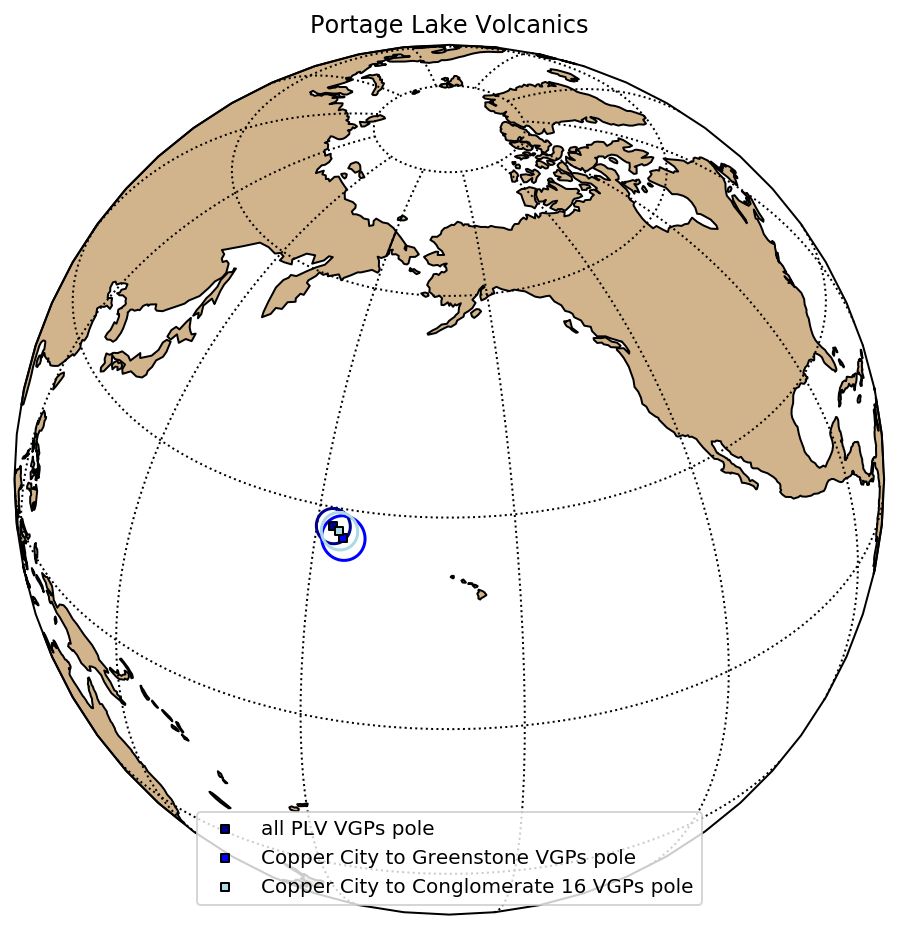

In [70]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_pole(m,PLV_pole['dec'],
                PLV_pole['inc'],
                PLV_pole['alpha95'],
                marker='s',color='DarkBlue',
                label='all PLV VGPs pole')
ipmag.plot_pole(m,PLV_CC_GS_pole['dec'],
                PLV_CC_GS_pole['inc'],
                PLV_CC_GS_pole['alpha95'],
                marker='s',color='Blue',
                label='Copper City to Greenstone VGPs pole')
ipmag.plot_pole(m,PLV_CC_Cong16_pole['dec'],
                PLV_CC_Cong16_pole['inc'],
                PLV_CC_Cong16_pole['alpha95'],
                marker='s',color='LightBlue',
                label='Copper City to Conglomerate 16 VGPs pole')
# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.legend(loc=8)
plt.title('Portage Lake Volcanics')
plt.show()

In [71]:
PLV = pd.concat([PLV_CCtoGS_B72, PLV_GS_16_B72, PLV_16_top_B72, PLV_bottom_CC_H06, PLV_CCtoGS_H06, PLV_GS_top_H06])
PLV['age'] = round(((1093.36+1091.67)/2),2)
PLV['age_low'] = 1091.59
PLV['age_high'] = 1093.37

In [72]:
pole_means.loc['PLV'] = pd.Series({'PoleName' : 'Portage Lake Volcanics',
                                        'SLat' : round(PLV_CCtoGS_B72.lat.tolist()[0],2),
                                        'SLon' : 360+round(PLV_CCtoGS_B72.lon.tolist()[0],2),
                                        'PLat' : round(PLV_pole['inc'],1),
                                        'PLon' : round(PLV_pole['dec'],1),
                                        'A95' : round(PLV_pole['alpha95'],1),
                                        'K' : round(PLV_pole['k'],1),
                                        'N' : int(PLV_pole['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Books, 1972; Hnat et al., 2006',
                                        'AgeNominal' : round(((1093.36+1091.67)/2),2),
                                        'AgeLower' : 1091.59,
                                        'AgeUpper' : 1093.37,
                                        'AgeInfo' : '$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U dates on Copper City flow 1093.37 $\pm$ 0.53 Ma and Greenstone Flow 1091.59 $\pm$ 0.27 Ma provide a lower and upper bound',
                                        'AgeRef' : 'this study',
                                        'GaussianOrUniform' : 'gaussian',
                                        'Gaussian_2sigma' : round(((1093.37-1091.59)/2),2),
                                        'Q' : '6',
                                        'color' : '#409BBE'})

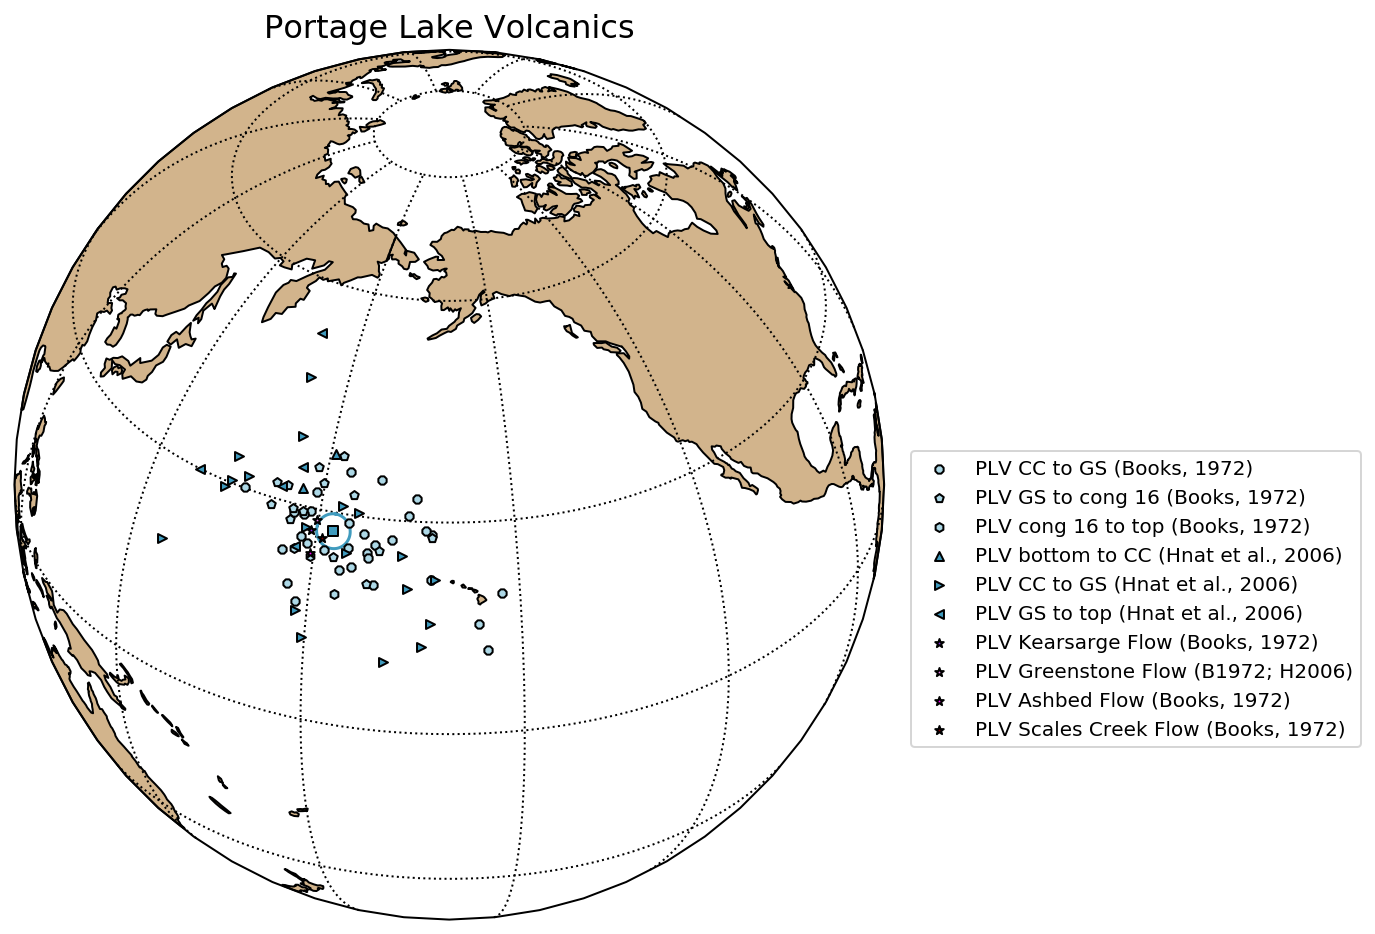

In [73]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,PLV_CCtoGS_B72['vgp_lon'].tolist(),PLV_CCtoGS_B72['vgp_lat'].tolist(),
               color='LightBlue',marker='8',label='PLV CC to GS (Books, 1972)')
ipmag.plot_vgp(m,PLV_GS_16_B72['vgp_lon'].tolist(),PLV_GS_16_B72['vgp_lat'].tolist(),
               color='LightBlue',marker='p',label='PLV GS to cong 16 (Books, 1972)')
ipmag.plot_vgp(m,PLV_16_top_B72['vgp_lon'].tolist(),PLV_16_top_B72['vgp_lat'].tolist(),
               color='LightBlue',marker='h',label='PLV cong 16 to top (Books, 1972)')

ipmag.plot_vgp(m,PLV_bottom_CC_H06['vgp_lon'].tolist(),PLV_bottom_CC_H06['vgp_lat'].tolist(),
               color=pole_means['color']['PLV'],marker='^',label='PLV bottom to CC (Hnat et al., 2006)')
ipmag.plot_vgp(m,PLV_CCtoGS_H06['vgp_lon'].tolist(),PLV_CCtoGS_H06['vgp_lat'].tolist(),
               color=pole_means['color']['PLV'],marker='>',label='PLV CC to GS (Hnat et al., 2006)')
ipmag.plot_vgp(m,PLV_GS_top_H06['vgp_lon'].tolist(),PLV_GS_top_H06['vgp_lat'].tolist(),
               color=pole_means['color']['PLV'],marker='<',label='PLV GS to top (Hnat et al., 2006)')

ipmag.plot_vgp(m,PLV_Kearsarge_B72_mean_vgp['dec'],PLV_Kearsarge_B72_mean_vgp['inc'],
               color='BlueViolet',marker='*',label='PLV Kearsarge Flow (Books, 1972)')
ipmag.plot_vgp(m,PLV_Greenstone_mean_vgp['dec'],PLV_Greenstone_mean_vgp['inc'],
               color='Violet',marker='*',label='PLV Greenstone Flow (B1972; H2006)')
ipmag.plot_vgp(m,PLV_Ashbed_B72_mean_vgp['dec'],PLV_Ashbed_B72_mean_vgp['inc'],
               color='Magenta',marker='*',label='PLV Ashbed Flow (Books, 1972)')
ipmag.plot_vgp(m,PLV_Scales_B72_mean_vgp['dec'],PLV_Scales_B72_mean_vgp['inc'],
               color='Maroon',marker='*',label='PLV Scales Creek Flow (Books, 1972)')

ipmag.plot_pole(m,pole_means['PLon']['PLV'],
                pole_means['PLat']['PLV'],
                pole_means['A95']['PLV'],
                marker='s',color=pole_means['color']['PLV'],
                edgecolor='k',markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.legend(bbox_to_anchor=(1.56, .55))
plt.title('Portage Lake Volcanics',fontsize=16)
#plt.savefig('./Plots/vgps_PLV.svg')
plt.show()

### Lake Shore traps pole
#### Diehl and Haig (1994) data

The Lake Shore Traps site data developed by Diehl and Haig (1994) were contributed to the MagIC database as part of this compilation effort and can be found here: https://earthref.org/MagIC/16334

In [74]:
Diehl1994a_sites = pd.read_csv('Diehl1994/sites.txt',sep='\t',header=1)
Diehl1994a_sites['age'] = 1085.47
Diehl1994a_sites['age_low'] = 1084
Diehl1994a_sites['age_high'] = 1091

In [75]:
LST_Diehl_VGPs=ipmag.make_di_block(Diehl1994a_sites['vgp_lon'],
                                   Diehl1994a_sites['vgp_lat'])
LST_Diehl_mean = pmag.fisher_mean(LST_Diehl_VGPs)
ipmag.print_pole_mean(LST_Diehl_mean)

Plon: 180.8  Plat: 22.2
Number of directions in mean (n): 30
Angular radius of 95% confidence (A_95): 4.5
Precision parameter (k) estimate: 35.0


#### Kulakov et al. (2013) data

The Lake Shore Traps site data developed by Kulakov et al. (2013) were contributed to the MagIC database as part of this compilation effort and can be found here: https://earthref.org/MagIC/16335

In [76]:
Kulakov2013a_LST_Sites = pd.read_csv('Kulakov2013/sites.txt',sep='\t',header=1)
LST_Kulakov_VGPs=ipmag.make_di_block(Kulakov2013a_LST_Sites['vgp_lon'],
                                     Kulakov2013a_LST_Sites['vgp_lat'])
LST_Kulakov_mean=pmag.fisher_mean(LST_Kulakov_VGPs)
print('Mean of Kulakov et al. (2013) VGPs: \n')
ipmag.print_pole_mean(LST_Kulakov_mean)

Mean of Kulakov et al. (2013) VGPs: 

Plon: 192.9  Plat: 23.9
Number of directions in mean (n): 21
Angular radius of 95% confidence (A_95): 3.3
Precision parameter (k) estimate: 95.3


Kulakov et al. (2013) reported data for the flow LST28 that supersedes the Diehl direction which should accordingly be dropped in order to calculate a combined mean.

In [77]:
Diehl1994a_sites_filtered = Diehl1994a_sites.drop(17)
Diehl1994a_sites_filtered.reset_index(inplace=True)

LST_Diehl_VGPs_pruned=ipmag.make_di_block(Diehl1994a_sites_filtered['vgp_lon'],
                                   Diehl1994a_sites_filtered['vgp_lat'])

LST_VGPs=np.concatenate((LST_Diehl_VGPs_pruned,LST_Kulakov_VGPs))

LST_all_mean=pmag.fisher_mean(LST_VGPs)

print('\nCombined Diehl and Haig (1994) + Kulakov et al. (2013) mean: \n')
ipmag.print_pole_mean(LST_all_mean)


Combined Diehl and Haig (1994) + Kulakov et al. (2013) mean: 

Plon: 185.7  Plat: 23.1
Number of directions in mean (n): 50
Angular radius of 95% confidence (A_95): 3.3
Precision parameter (k) estimate: 38.8


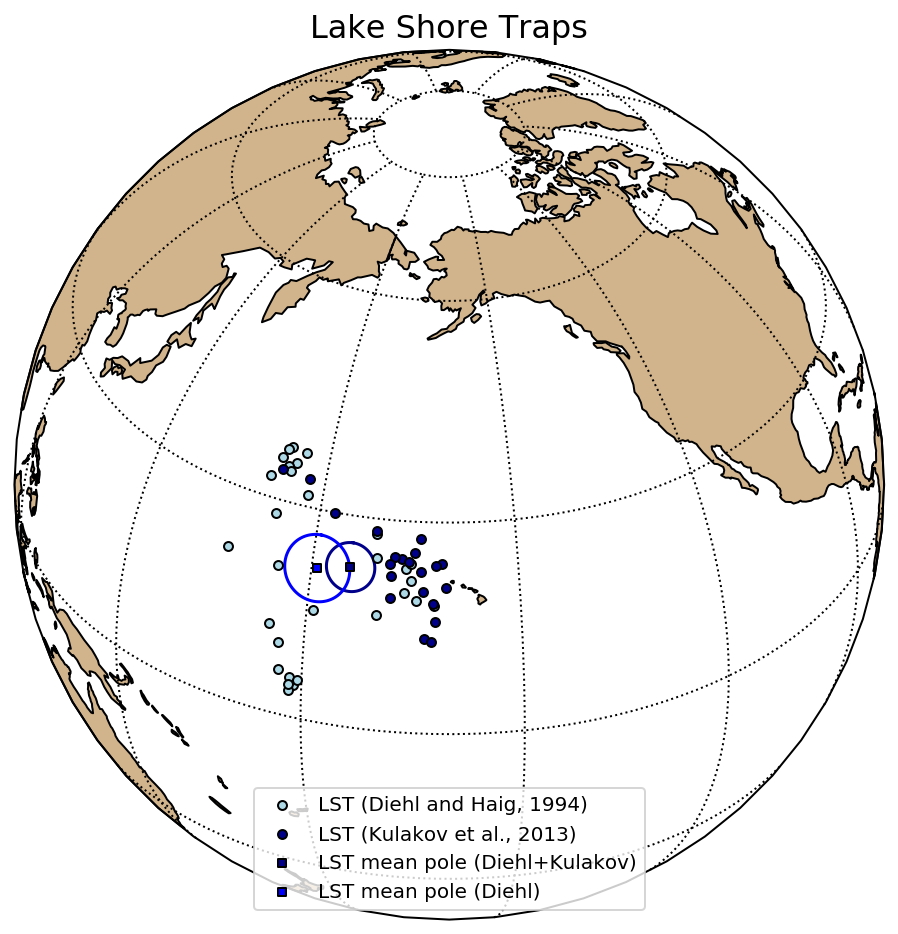

In [78]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,Diehl1994a_sites['vgp_lon'].tolist(),
               Diehl1994a_sites['vgp_lat'].tolist(),
              label='LST (Diehl and Haig, 1994)',color='lightblue')
ipmag.plot_vgp(m,Kulakov2013a_LST_Sites['vgp_lon'].tolist(),
               Kulakov2013a_LST_Sites['vgp_lat'].tolist(),
              label='LST (Kulakov et al., 2013)',color='darkblue')
ipmag.plot_pole(m,LST_all_mean['dec'],LST_all_mean['inc'],
                LST_all_mean['alpha95'], color='darkblue',label='LST mean pole (Diehl+Kulakov)',marker='s')
ipmag.plot_pole(m,LST_Diehl_mean['dec'],LST_Diehl_mean['inc'],
                LST_Diehl_mean['alpha95'], color='blue',
                label='LST mean pole (Diehl)', marker='s')
# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.title('Lake Shore Traps',fontsize=16)
plt.legend(loc=8)
#plt.savefig('./Plots/vgps_LST.svg')
plt.show()

In [79]:
pole_means.loc['LST'] = pd.Series({'PoleName' : 'Lake Shore Traps',
                                        'SLat' : round(Diehl1994a_sites.lat.tolist()[0],2),
                                        'SLon' : 360+round(Diehl1994a_sites.lon.tolist()[0],2),
                                        'PLat' : round(LST_Diehl_mean['inc'],1),
                                        'PLon' : round(LST_Diehl_mean['dec'],1),
                                        'A95' : round(LST_Diehl_mean['alpha95'],1),
                                        'K' : round(LST_Diehl_mean['k'],1),
                                        'N' : int(LST_Diehl_mean['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Diehl and Haig, 1994',
                                        'AgeNominal' : 1085.47,
                                        'AgeLower' : 1084,
                                        'AgeUpper' : 1091,
                                        'AgeInfo' : 'Younger than Greenstone Flow, $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U date on Lake Shore Trap andesitic flow of 1085.47 $\pm$ 0.32 Ma',
                                        'AgeRef' : 'Fairchild et al., 2017; this study',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '6',
                                        'color' : '#76C1C3'})

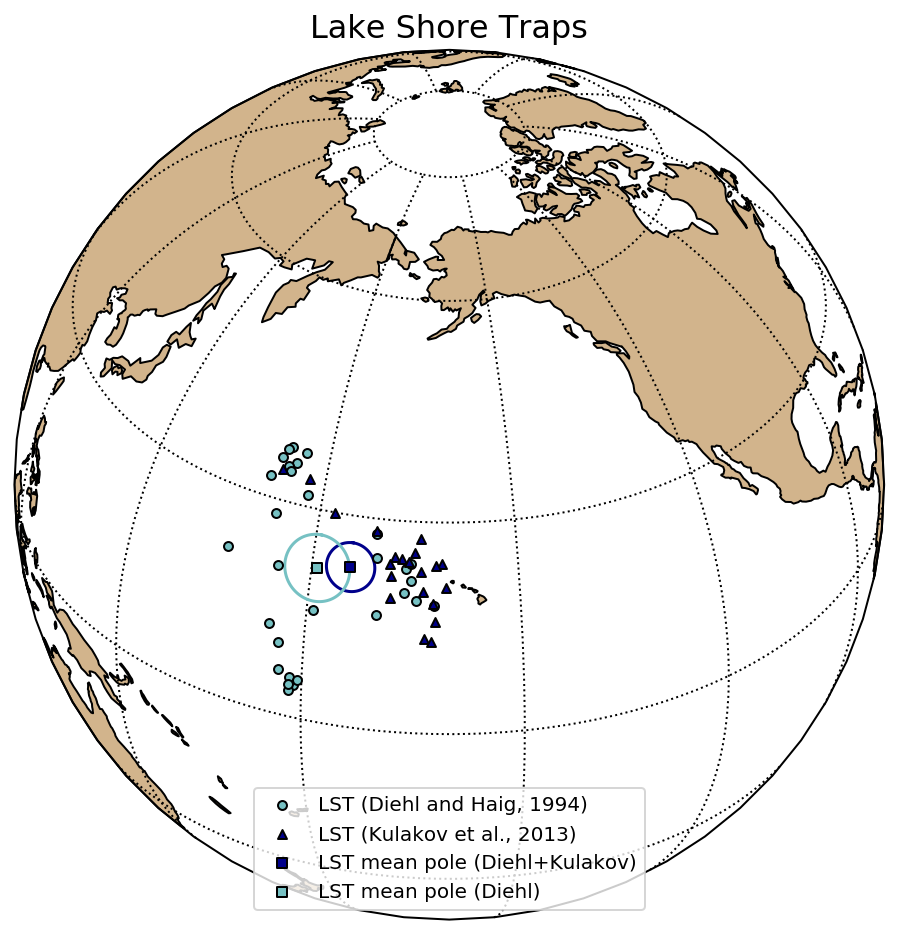

In [80]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,Diehl1994a_sites['vgp_lon'].tolist(),
               Diehl1994a_sites['vgp_lat'].tolist(),
               label='LST (Diehl and Haig, 1994)',
               color=pole_means['color']['LST'],marker='o')
ipmag.plot_vgp(m,Kulakov2013a_LST_Sites['vgp_lon'].tolist(),
               Kulakov2013a_LST_Sites['vgp_lat'].tolist(),
              label='LST (Kulakov et al., 2013)',color='darkblue',marker='^')
ipmag.plot_pole(m,LST_all_mean['dec'],LST_all_mean['inc'],
                LST_all_mean['alpha95'], color='darkblue',
                edgecolor='k',markersize=30,
                label='LST mean pole (Diehl+Kulakov)',marker='s')
ipmag.plot_pole(m,pole_means['PLon']['LST'],
                pole_means['PLat']['LST'],
                pole_means['A95']['LST'],
                marker='s',color=pole_means['color']['LST'],
                edgecolor='k',markersize=30,
                label='LST mean pole (Diehl)')

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.title('Lake Shore Traps',fontsize=16)
plt.legend(loc=8)
#plt.savefig('./Plots/vgps_LST.svg')
plt.show()

## Powder Mill Group Volcanics

Sites 11 and 12 are from the Portage Lake Volcanics. Sites 42, 43 and 44 are in rocks where the is pervasive development of amphibole development and partial obliteration of original igneous texture.

Palmer and Halls split their data into three main structural panels: (1) steep dips, ENE strike,(2) steep dips, E to ENE strike and,(3) moderate to shallow dips, east strike. They argue that the 3rd panel is the best constrained and provides the most reliable pole position. This panel is comprised of sites 15-24. 

> In view of the uncertainty in structural correction to be applied to those sections of the Powder Mill volcanics that are close to the basement ridge,the most reliable estimate of the Powder Mill pole may be that from segment 3, although a relatively small stratigraphic interval has been sampled,thus increasing the risk that secular variation has not been averaged out.

As shown in the common mean test below, the data from panel 3 and the data from panels 1 and 2 are consistent with sharing a common mean. This result weakens the conclusion of Palmer and Halls (1986) that the data from panels 1 and 2 are more unreliable due to the need to structurally correct a steep panel. However, an additional benefit of calculating a pole solely based on the data from panel 3 is that all of the flows are within the Siemens Creek Volcanics rather than spanning both those volcanics and the Kallander Creek Volcanics. Therefore, we use this subset in the pole compilation.

Note that in this compilation, we do not include the combined site of 1-3 as the samples were collected from multiple lava flows. This combined site is not in panel 3.

In [81]:
Palmer1986 = pd.read_csv('Palmer1986/Palmer1986_site.csv',sep=',')
Palmer1986_PM = Palmer1986[Palmer1986['site'] != 11]
Palmer1986_PM = Palmer1986_PM[Palmer1986_PM['site'] != 12]
Palmer1986_PM = Palmer1986_PM[Palmer1986_PM['site'] != 42]
Palmer1986_PM = Palmer1986_PM[Palmer1986_PM['site'] != 43]
Palmer1986_PM = Palmer1986_PM[Palmer1986_PM['site'] != 44]

third_panel_sites = [15,16,17,18,19,20,21,22,23,24]
other_sites = [4,6,7,8,9,10,13,14,25,28,29,30,31,33,34,35,36,37,38,39,40,41]
Palmer1986_PM_reliable = Palmer1986_PM.loc[Palmer1986_PM['site'].isin(third_panel_sites)]
Palmer1986_PM_unreliable = Palmer1986_PM.loc[Palmer1986_PM['site'].isin(other_sites)]

In [82]:
Powder_Mill_VGPs = ipmag.make_di_block(Palmer1986_PM['vgp_lon'].tolist(),
                                   Palmer1986_PM['vgp_lat'].tolist())
Powder_Mill_Pole = ipmag.fisher_mean(di_block=Powder_Mill_VGPs)
ipmag.print_pole_mean(Powder_Mill_Pole)

Plon: 217.0  Plat: 38.5
Number of directions in mean (n): 32
Angular radius of 95% confidence (A_95): 5.6
Precision parameter (k) estimate: 21.4


In [83]:
Powder_Mill_VGPs_reliable = ipmag.make_di_block(Palmer1986_PM_reliable['vgp_lon'].tolist(),
                                   Palmer1986_PM_reliable['vgp_lat'].tolist())
Powder_Mill_Pole_reliable = ipmag.fisher_mean(di_block=Powder_Mill_VGPs_reliable)
ipmag.print_pole_mean(Powder_Mill_Pole_reliable)

Plon: 214.0  Plat: 45.8
Number of directions in mean (n): 10
Angular radius of 95% confidence (A_95): 9.2
Precision parameter (k) estimate: 28.3


In [84]:
Powder_Mill_VGPs_unreliable = ipmag.make_di_block(Palmer1986_PM_unreliable['vgp_lon'].tolist(),
                                   Palmer1986_PM_unreliable['vgp_lat'].tolist())
Powder_Mill_Pole_unreliable = ipmag.fisher_mean(di_block=Powder_Mill_VGPs_unreliable)
ipmag.print_pole_mean(Powder_Mill_Pole_unreliable)

Plon: 218.2  Plat: 35.1
Number of directions in mean (n): 22
Angular radius of 95% confidence (A_95): 7.0
Precision parameter (k) estimate: 20.8


In [85]:
# ipmag.common_mean_bootstrap(Powder_Mill_VGPs_unreliable,Powder_Mill_VGPs_reliable)

In [86]:
PM = Palmer1986_PM_reliable
PM['age'] = 1108
PM['age_low'] = 1105
PM['age_high'] = 1111

In [87]:
pole_means.loc['PM'] = pd.Series({'PoleName' : 'Siemens Creek Volcanics',
                                        'SLat' : 46.5,
                                        'SLon' : 360-90.2,
                                        'PLat' : round(Powder_Mill_Pole_reliable['inc'],1),
                                        'PLon' : round(Powder_Mill_Pole_reliable['dec'],1),
                                        'A95' : round(Powder_Mill_Pole_reliable['alpha95'],1),
                                        'K' : round(Powder_Mill_Pole_reliable['k'],1),
                                        'N' : int(Powder_Mill_Pole_reliable['n']),
                                        'PolarityZone' : 'Alona Bay reversed-polarity zone',
                                        'PmagRef' : 'Palmer and Halls, 1986',
                                        'AgeNominal' : 1108,
                                        'AgeLower' : 1105,
                                        'AgeUpper' : 1111,
                                        'AgeInfo' : 'Older than the $^{\mathrm{207}}$Pb/$^{\mathrm{206}}$Pb date of 1107.3 $\pm$ 1.6 Ma from a rhyolite in the Kallander Creek Volcanics',
                                        'AgeRef' : 'Davis and Green, 1997',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '6',
                                        'color' : '#CD4F45'})

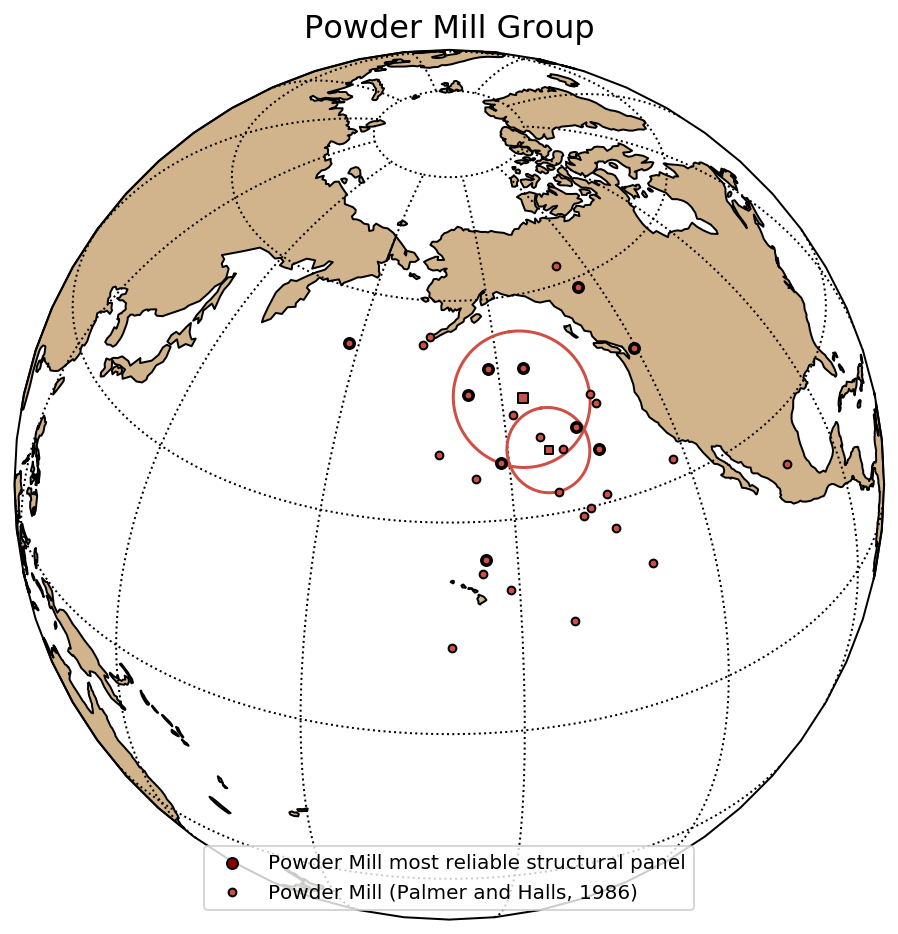

In [88]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,di_block=Powder_Mill_VGPs_reliable,
               label='Powder Mill most reliable structural panel',
               color='darkred', markersize=30)
ipmag.plot_vgp(m,di_block=Powder_Mill_VGPs,
               label='Powder Mill (Palmer and Halls, 1986)',
               color=pole_means['color']['PM'],markersize=15)
ipmag.plot_pole(m,Powder_Mill_Pole['dec'],Powder_Mill_Pole['inc'],
                Powder_Mill_Pole['alpha95'], marker='s',
                color=pole_means['color']['PM'],markersize=15)

ipmag.plot_pole(m,pole_means['PLon']['PM'],
                pole_means['PLat']['PM'],
                pole_means['A95']['PM'],
                marker='s',color=pole_means['color']['PM'],
                edgecolor='k',markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.title('Powder Mill Group',fontsize=16)
plt.legend(loc=8)
#plt.savefig('./Plots/vgps_PM.svg')
plt.show()

## Michopicoten Island

The geology of Michipicoten Island can be divided into three distinct magmatic intervals:

- the basal interval consists primarily of sub-ophitic to ophitic olivine tholeiitic basalt flows (correlated by Annells [1974] to the main stage volcanics of the Mamainse Point Formation)
- hypabyssal quartz porphyry, granophyre, and intermediate intrusions  emplaced into the Quebec Mine Member basalt flows 
- Michipicoten Island Formation which unconformably overlies the intrusions and comprises: conglomerate/agglomerate deposits, thick intermediate to felsic flows, and tholeiitic basalt flows

Fairchild et al. (2017) presented new CA-ID-TIMS $^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U zircon dates from a Michipicoten Island Formation tuff (1084.35 ± 0.20 Ma) and rhyolite (1083.52 ± 0.23 Ma) along with new paleomagnetic data from intervening flows which are bracketed by these dates. 

Palmer and Davis (1987) dated a quartz-feldspar porphyry intrusion with a reported Concordia intercept U-Pb zircon date for the porphyry of 1086.5 + 1.3/- 3.0 Ma. With the interpretation of the dated unit having intruded prior to the eruption of the flows of the Michipicoten Island Formation, the Michipicoten Island Formation pole is the youngest pole from a volcanic unit in the Midcontinent Rift.

### Import Palmer and Davis (1997) data

https://earthref.org/MagIC/13470

### lower Michipicoten Island Quebec Mine Member basalts

Palmer and Davis (1987) developed data from 8 sites with the sub-ophitic to ophitic olivine tholeiitic basalt flows of the Quebec Mine Member stratigraphically below the Michipicoten Island intrusions that Annells interpreted to correlate to the Mamainse Point Formation. They also report data from a site "KM" for which samples came from multiple flows and will not be included here as it does not met the definition of a site as a single cooling unit. 

In [89]:
Palmer1987_results = pd.read_csv('Palmer1987/pmag_results.txt',sep='\t',skiprows=1)
Palmer1987_QM = Palmer1987_results[Palmer1987_results.er_location_names=='Mamainse Point Formation, Michipicoten Island']
Palmer1987_QM_sites = Palmer1987_QM[Palmer1987_QM.data_type=='i']
Palmer1987_QM_sites = Palmer1987_QM_sites[Palmer1987_QM_sites.er_site_names!='KM']

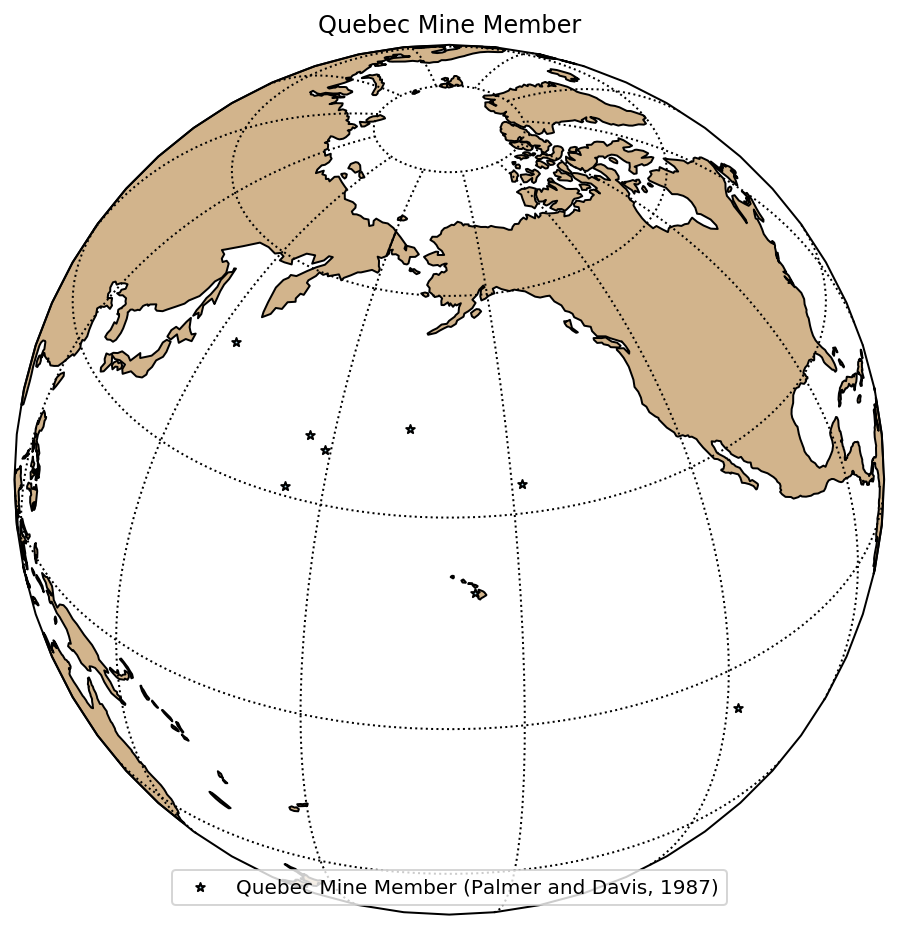

In [90]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,Palmer1987_QM_sites['vgp_lon'].tolist(),Palmer1987_QM_sites['vgp_lat'].tolist(),
               color='LightBlue',marker='*',label='Quebec Mine Member (Palmer and Davis, 1987)')

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.legend(loc=8)
plt.title('Quebec Mine Member')
plt.show()

Site 18 appears to be an outlier and perhaps should be removed from the the calculation of the mean.

In [91]:
Palmer1987_QM_sites = Palmer1987_QM_sites[Palmer1987_QM_sites.er_site_names!='18']

In [92]:
Palmer1987_QM_sites = Palmer1987_QM_sites[Palmer1987_QM_sites.er_site_names!='KM']

In [93]:
MI_QM_VGPs = ipmag.make_di_block(Palmer1987_QM_sites.vgp_lon.tolist(),
                                 Palmer1987_QM_sites.vgp_lat.tolist())
MI_QM_mean=pmag.fisher_mean(MI_QM_VGPs)
ipmag.print_pole_mean(MI_QM_mean)

Plon: 185.6  Plat: 36.9
Number of directions in mean (n): 7
Angular radius of 95% confidence (A_95): 13.4
Precision parameter (k) estimate: 21.2


### Import Fairchild et al. (2017)

We have imported data from Fairchild et al. (2017) from the MagIC contribution in the Fairchild2017_results dataframe. Filtering this dataframe by location, component and tilt correction gets the results needed for the pole.

In [94]:
Fairchild2017_MIF = pd.read_csv('Fairchild2017/pmag_results_Michipicoten.txt',sep='\t',header=1)
Fairchild2017_MIF = Fairchild2017_MIF[Fairchild2017_MIF['pole_comp_name'] == 'HT']
Fairchild2017_MIF = Fairchild2017_MIF[Fairchild2017_MIF['tilt_correction'] == 100.0]
Fairchild2017_MIF = Fairchild2017_MIF[Fairchild2017_MIF['er_site_names'] != 'CM1']
Fairchild2017_MIF = Fairchild2017_MIF[Fairchild2017_MIF['er_site_names'] != 'CM2']

In [95]:
Quebec_Harbour_Member_Palmer87 = [171.701143, 40.970516] 
Davieaux_Island_Member_Palmer87 = [178.210301, 18.732965]

combined_MIF_lon = Fairchild2017_MIF['vgp_lon'].tolist()
combined_MIF_lon.append(Quebec_Harbour_Member_Palmer87[0])
combined_MIF_lon.append(Davieaux_Island_Member_Palmer87[0])

combined_MIF_lat = Fairchild2017_MIF['vgp_lat'].tolist()
combined_MIF_lat.append(Quebec_Harbour_Member_Palmer87[1])
combined_MIF_lat.append(Davieaux_Island_Member_Palmer87[1])

MIF_pole = ipmag.fisher_mean(combined_MIF_lon,combined_MIF_lat)
ipmag.print_pole_mean(MIF_pole)

Plon: 174.7  Plat: 17.0
Number of directions in mean (n): 23
Angular radius of 95% confidence (A_95): 4.4
Precision parameter (k) estimate: 48.2


In [96]:
QM = Palmer1987_QM_sites
QM['age'] = 1095
QM['age_low'] = 1086.5
QM['age_high'] = 1100

In [97]:
MI = Fairchild2017_MIF
MI['age'] = round(((1084.39+1083.52)/2),2)
MI['age_low'] = 1083.52
MI['age_high'] = 1084.39

In [98]:
pole_means.loc['QM'] = pd.Series({'PoleName' : 'Quebec Mine Member (Michipicoten Island)',
                                        'SLat' : 47.80,
                                        'SLon' : 274.25,
                                        'PLat' : round(MI_QM_mean['inc'],1),
                                        'PLon' : round(MI_QM_mean['dec'],1),
                                        'A95' : round(MI_QM_mean['alpha95'],1),
                                        'K' : round(MI_QM_mean['k'],1),
                                        'N' : int(MI_QM_mean['n']),
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Palmer and Davis, 1987',
                                        'AgeNominal' : 1095,
                                        'AgeLower' : 1086.5,
                                        'AgeUpper' : 1100,
                                        'AgeInfo' : 'Older than ca. 1086.5 Ma $^{\mathrm{207}}$Pb/$^{\mathrm{206}}$Pb date on Michipicoten intrusive porphyry',
                                        'AgeRef' : 'Palmer and Davis, 1987',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '5',
                                        'color' : '#385C6A'})

pole_means.loc['MI'] = pd.Series({'PoleName' : 'Michipicoten Island Formation',
                                        'SLat' : 47.70,
                                        'SLon' : 360-85.85,
                                        'PLat' : round(MIF_pole['inc'],1),
                                        'PLon' : round(MIF_pole['dec'],1),
                                        'A95' : round(MIF_pole['alpha95'],1),
                                        'K' : round(MIF_pole['k'],1),
                                        'N' : MIF_pole['n'],
                                        'PolarityZone' : 'Portage Lake normal-polarity zone',
                                        'PmagRef' : 'Palmer and Davis, 1987); Fairchild et al., 2017',
                                        'AgeNominal' : round(((1084.39+1083.52)/2),2),
                                        'AgeLower' : 1083.52,
                                        'AgeUpper' : 1084.39,
                                        'AgeInfo' : '$^{\mathrm{206}}$Pb/$^{\mathrm{238}}$U dates on the West Sand Bay tuff 1084.39 $\pm$ 0.21 Ma and the Davieux Island Rhyolite 1083.52 $\pm$ 0.23 Ma bracket the VGPs',
                                        'AgeRef' : 'Fairchild et al., 2017',
                                        'GaussianOrUniform' : 'gaussian',
                                        'Gaussian_2sigma' : round(((1084.39-1083.52)/2),2),
                                        'Q' : '6',
                                        'color' : '#9FD6BD'})

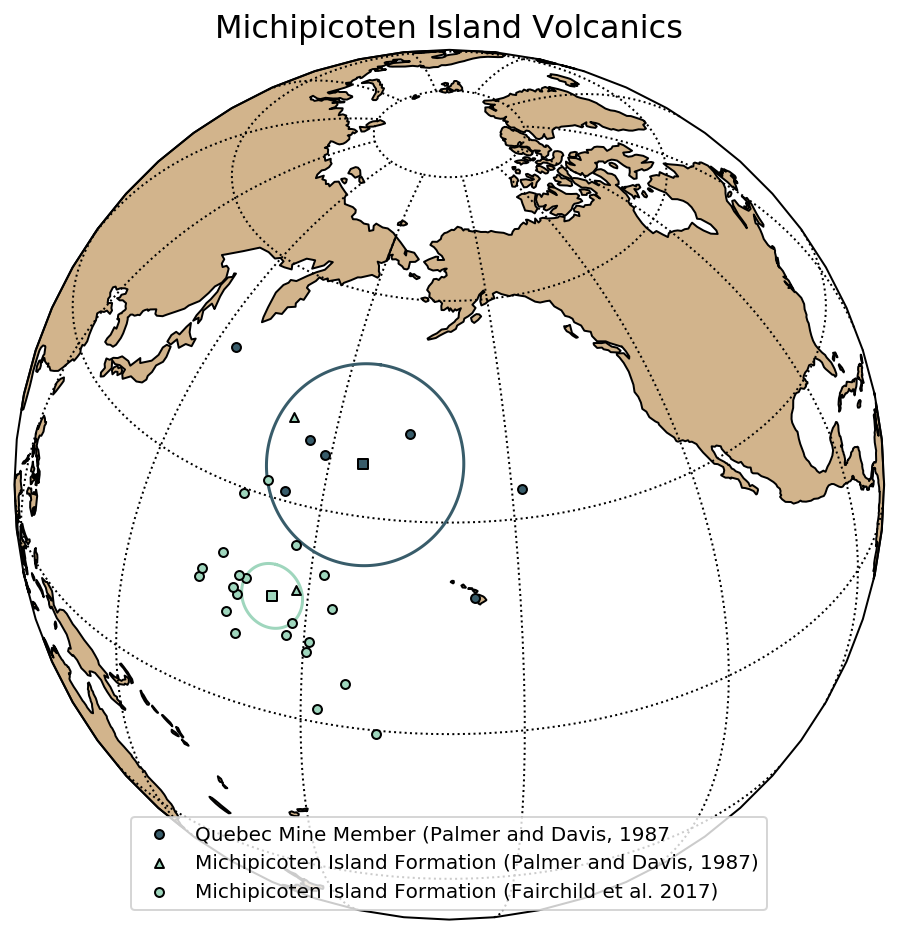

In [99]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

ipmag.plot_vgp(m,Palmer1987_QM_sites['vgp_lon'].tolist(),Palmer1987_QM_sites['vgp_lat'].tolist(),
               color=pole_means['color']['QM'],label='Quebec Mine Member (Palmer and Davis, 1987')
ipmag.plot_pole(m,pole_means['PLon']['QM'],
                pole_means['PLat']['QM'],
                pole_means['A95']['QM'],
                marker='s',color=pole_means['color']['QM'],
                edgecolor='k',markersize=30)

ipmag.plot_vgp(m,Quebec_Harbour_Member_Palmer87[0],Quebec_Harbour_Member_Palmer87[1],
               color=pole_means['color']['MI'],marker='^',label='Michipicoten Island Formation (Palmer and Davis, 1987)')
ipmag.plot_vgp(m,Davieaux_Island_Member_Palmer87[0],Davieaux_Island_Member_Palmer87[1],
               color=pole_means['color']['MI'],marker='^',)
ipmag.plot_vgp(m,Fairchild2017_MIF['vgp_lon'].tolist(),Fairchild2017_MIF['vgp_lat'].tolist(),
               color=pole_means['color']['MI'],label='Michipicoten Island Formation (Fairchild et al. 2017)')
ipmag.plot_pole(m,pole_means['PLon']['MI'],
                pole_means['PLat']['MI'],
                pole_means['A95']['MI'],
                marker='s',color=pole_means['color']['MI'],
                edgecolor='k',markersize=30)

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.legend(loc=8)
plt.title('Michipicoten Island Volcanics',fontsize=16)
#plt.savefig('./Plots/vgps_Mich.svg')
plt.show()

## Midcontinent Rift sedimentary poles

Sedimentary poles are taken as the site mean poles of Henry et al., 1977.

In [100]:
Nonesuch_pole = pmag.dia_vgp(276.8,8.1,7.8,46.7,-89.9)
Nonesuch_A95 = np.sqrt(Nonesuch_pole[2]*Nonesuch_pole[3])

Freda_pole = pmag.dia_vgp(272.4,1.5,5.9,46.7,-89.9)
Freda_A95 = np.sqrt(Freda_pole[2]*Freda_pole[3])

In [101]:
pole_means.loc['Nonesuch'] = pd.Series({'PoleName' : 'Nonesuch Formation',
                                        'SLat' : 46.7,
                                        'SLon' : 360-89.9,
                                        'PLat' : 7.6,
                                        'PLon' : 178.1,
                                        'A95' : round(Nonesuch_A95,1),
                                        'N' : 11,
                                        'PolarityZone' : 'Portage Lake normal-polarity zone (sed)',
                                        'PmagRef' : 'Henry et al., 1977',
                                        'AgeNominal' : 1080,
                                        'AgeLower' : 1070,
                                        'AgeUpper' : 1083.5,
                                        'AgeInfo' : 'Likely younger than Michipicoten Island Formation. Deposited prior to eruption of Bear Lake Volcanics in lower Freda Sandstone',
                                        'AgeRef' : '',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '',
                                        'color' : '#B3D566'})

In [102]:
pole_means.loc['Freda'] = pd.Series({'PoleName' : 'Freda Formation',
                                        'SLat' : 46.7,
                                        'SLon' : 360-89.9,
                                        'PLat' : 2.2,
                                        'PLon' : 179.0,
                                        'A95' : round(Freda_A95,1),
                                        'N' : 20,
                                        'PolarityZone' : 'Portage Lake normal-polarity zone (sed)',
                                        'PmagRef' : 'Henry et al., 1977',
                                        'AgeNominal' : 1070,
                                        'AgeLower' : 1060,
                                        'AgeUpper' : 1083.5,
                                        'AgeInfo' : 'Data come from lowermost Freda Formation. Interbedded Bear Lake Volcanics suggest that not too much younger than youngest rift volcanism',
                                        'GaussianOrUniform' : 'uniform',
                                        'Q' : '',
                                        'color' : '#D5C888'})

In [103]:
pole_means

PoleName   SLat  \
Osler_R1                                        Osler reverse (lower)  48.80   
Osler_R2                                        Osler reverse (upper)  48.59   
Osler_N                                                  Osler normal  48.64   
MP_lowerR1                                  Mamainse lower reversed 1  47.10   
MP_lowerR2                                  Mamainse lower reversed 2  47.09   
MP_lowerNupperR              Mamainse lower normal and upper reversed  47.07   
MP_upperN                                       Mamainse upper normal  47.06   
Grand Portage Basalts                           Grand Portage Basalts  47.93   
NSVG_nneu              North Shore Volcanic Group (upper NE sequence)  47.61   
NSVG_nswu              North Shore Volcanic Group (upper SW sequence)  47.20   
SLB                                          Schroeder Lutsen Basalts  47.54   
PLV                                            Portage Lake Volcanics  47.29   
LST                                                  Lake Shore Traps  47.43   
PM                                            Siemens Creek Volcanics  46.50   
QM                           Quebec Mine Member (Michipicoten Island)  47.80   
MI                                      Michipicoten Island Formation  47.70   
Nonesuch                                           Nonesuch Formation  46.70   
Freda                                                 Freda Formation  46.70   

                         SLon  PLat   PLon   A95      K   N  \
Osler_R1               272.34  40.9  218.6   4.8   31.5  30   
Osler_R2               271.81  42.3  203.4   3.7   24.4  64   
Osler_N                271.91  30.2  173.7   8.6  114.6   4   
MP_lowerR1             275.29  49.5  227.0   5.3   31.7  24   
MP_lowerR2             275.27  37.5  205.2   4.5   78.6  14   
MP_lowerNupperR        275.26  36.1  189.7   4.9   37.3  24   
MP_upperN              275.25  31.2  183.2   2.5   94.4  34   
Grand Portage Basalts  270.28  46.0  201.7   6.8   38.3  13   
NSVG_nneu              269.23  40.3  291.3   4.9   32.1  28   
NSVG_nswu              268.50  36.9  179.3   2.1   56.8  78   
SLB                    269.10  28.3  187.6   2.5   50.5  65   
PLV                    271.59  27.5  182.5   2.3   48.7  78   
LST                    272.29  22.2  180.8   4.5   35.0  30   
PM                     269.80  45.8  214.0   9.2   28.3  10   
QM                     274.25  36.9  185.6  13.4   21.2   7   
MI                     274.15  17.0  174.7   4.4   48.2  23   
Nonesuch               270.10   7.6  178.1   5.6    NaN  11   
Freda                  270.10   2.2  179.0   4.2    NaN  20   

                                                       PolarityZone  \
Osler_R1                           Alona Bay reversed-polarity zone   
Osler_R2                           Alona Bay reversed-polarity zone   
Osler_N                           Portage Lake normal-polarity zone   
MP_lowerR1                         Alona Bay reversed-polarity zone   
MP_lowerR2                         Alona Bay reversed-polarity zone   
MP_lowerNupperR        Flour Bay normal and reversed polarity zones   
MP_upperN                         Portage Lake normal-polarity zone   
Grand Portage Basalts              Alona Bay reversed-polarity zone   
NSVG_nneu                         Portage Lake normal-polarity zone   
NSVG_nswu                         Portage Lake normal-polarity zone   
SLB                               Portage Lake normal-polarity zone   
PLV                               Portage Lake normal-polarity zone   
LST                               Portage Lake normal-polarity zone   
PM                                 Alona Bay reversed-polarity zone   
QM                                Portage Lake normal-polarity zone   
MI                                Portage Lake normal-polarity zone   
Nonesuch                    Portage Lake normal-polarity zone (sed)   
Freda                       Portage Lake normal-polarity zone (s

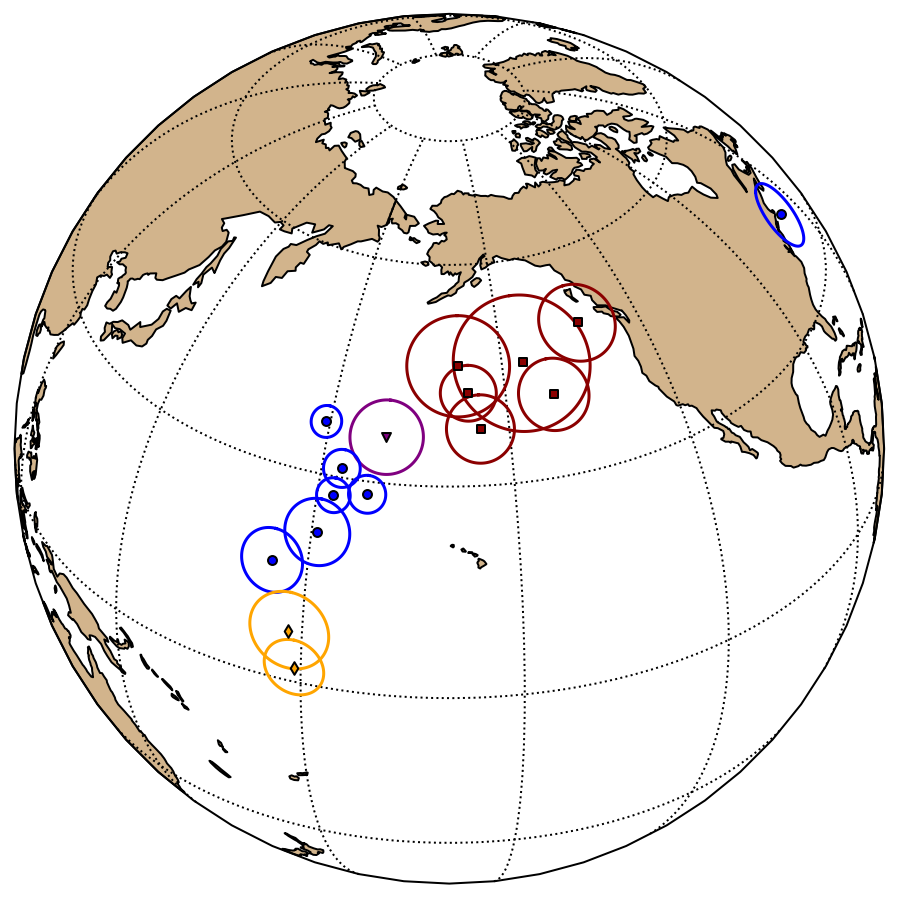

In [104]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

pole_means_Alona_R = pole_means[pole_means['PolarityZone']=='Alona Bay reversed-polarity zone']
for n in range(0,len(pole_means_Alona_R['PLon'].tolist())):
    if pole_means_Alona_R['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_Alona_R['PLon'].tolist()[n],
                        pole_means_Alona_R['PLat'].tolist()[n],
                        pole_means_Alona_R['A95'].tolist()[n],
                        marker='s',color='DarkRed')
    
pole_means_FB_NR = pole_means[pole_means['PolarityZone']=='Flour Bay normal and reversed polarity zones']
for n in range(0,len(pole_means_FB_NR['PLon'].tolist())):
    if pole_means_FB_NR['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_FB_NR['PLon'].tolist()[n],
                        pole_means_FB_NR['PLat'].tolist()[n],
                        pole_means_FB_NR['A95'].tolist()[n],
                        marker='v',color='Purple')
    
pole_means_Portage_N = pole_means[pole_means['PolarityZone']=='Portage Lake normal-polarity zone']
for n in range(0,len(pole_means_Portage_N['PLon'].tolist())):
    if pole_means_Portage_N['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_Portage_N['PLon'].tolist()[n],
                        pole_means_Portage_N['PLat'].tolist()[n],
                        pole_means_Portage_N['A95'].tolist()[n],
                        marker='o',color='Blue')
        
pole_means_Portage_N = pole_means[pole_means['PolarityZone']=='Portage Lake normal-polarity zone (sed)']
for n in range(0,len(pole_means_Portage_N['PLon'].tolist())):
    if pole_means_Portage_N['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_Portage_N['PLon'].tolist()[n],
                        pole_means_Portage_N['PLat'].tolist()[n],
                        pole_means_Portage_N['A95'].tolist()[n],
                        marker='d',color='Orange')

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
plt.show()

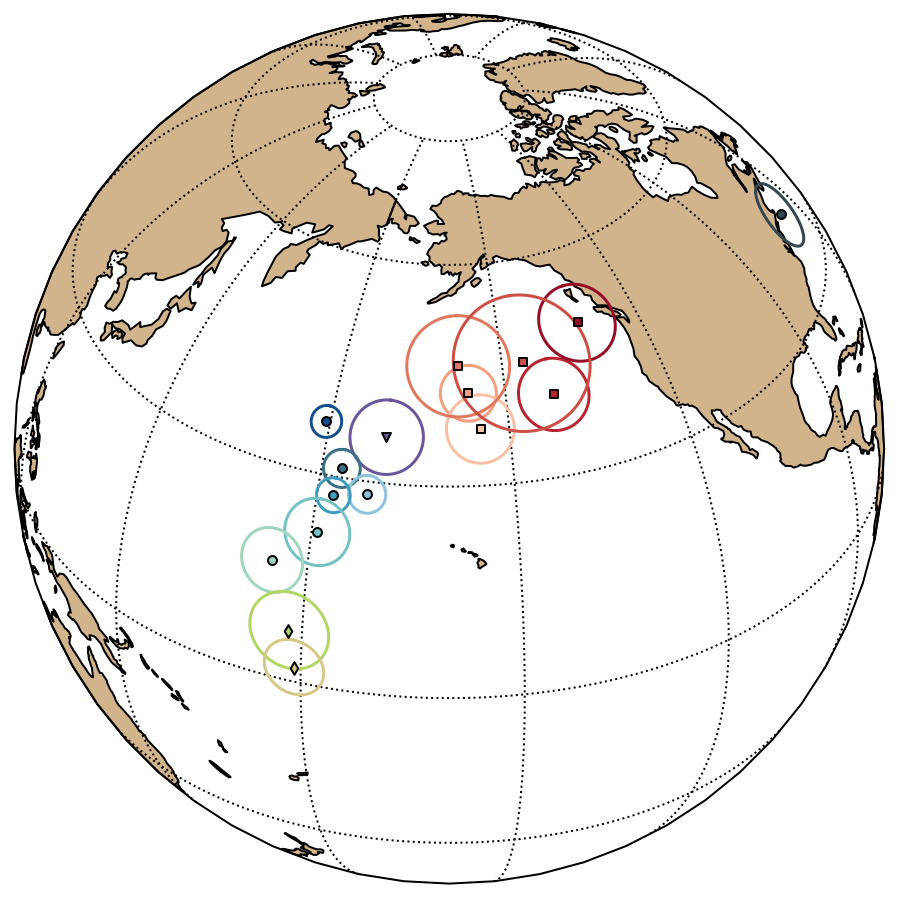

In [105]:
m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

pole_means_Alona_R = pole_means[pole_means['PolarityZone']=='Alona Bay reversed-polarity zone']
for n in range(0,len(pole_means_Alona_R['PLon'].tolist())):
    if pole_means_Alona_R['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_Alona_R['PLon'].tolist()[n],
                        pole_means_Alona_R['PLat'].tolist()[n],
                        pole_means_Alona_R['A95'].tolist()[n],
                        marker='s',color=pole_means_Alona_R['color'].tolist()[n])
    
pole_means_FB_NR = pole_means[pole_means['PolarityZone']=='Flour Bay normal and reversed polarity zones']
for n in range(0,len(pole_means_FB_NR['PLon'].tolist())):
    if pole_means_FB_NR['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_FB_NR['PLon'].tolist()[n],
                        pole_means_FB_NR['PLat'].tolist()[n],
                        pole_means_FB_NR['A95'].tolist()[n],
                        marker='v',color=pole_means_FB_NR['color'].tolist()[n])
    
pole_means_Portage_N = pole_means[pole_means['PolarityZone']=='Portage Lake normal-polarity zone']
for n in range(0,len(pole_means_Portage_N['PLon'].tolist())):
    if pole_means_Portage_N['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_Portage_N['PLon'].tolist()[n],
                        pole_means_Portage_N['PLat'].tolist()[n],
                        pole_means_Portage_N['A95'].tolist()[n],
                        marker='o',color=pole_means_Portage_N['color'].tolist()[n])
        
pole_means_Portage_N = pole_means[pole_means['PolarityZone']=='Portage Lake normal-polarity zone (sed)']
for n in range(0,len(pole_means_Portage_N['PLon'].tolist())):
    if pole_means_Portage_N['N'].tolist()[n]>9:
        ipmag.plot_pole(m,pole_means_Portage_N['PLon'].tolist()[n],
                        pole_means_Portage_N['PLat'].tolist()[n],
                        pole_means_Portage_N['A95'].tolist()[n],
                        marker='d',color=pole_means_Portage_N['color'].tolist()[n])

# m.readshapefile('../Data_Compiled/Laurentia_shape/Laurentia', 'Laurentia', linewidth=1.5)
# plt.legend(loc=4)
plt.show()

## combine all site level poles and ages

In [106]:
all_site_poles = pd.concat([Osler_lowerR, Osler_upperR, Osler_N, 
                            MP_sites_lowerR1, MP_sites_lowerR2, MP_sites_flourbay, MP_sites_upperN, 
                            Grand_portage_basalts, NSVG_nneu, NSVG_nswu, SLB, 
                            PLV, Diehl1994a_sites, PM, QM, MI])
all_site_poles = all_site_poles.reset_index(drop=1)

In [107]:
all_site_poles

age  age_high  age_low age_unit  bed_dip  bed_dip_direction  \
0    1108.00   1110.00  1105.15       Ma      NaN                NaN   
1    1108.00   1110.00  1105.15       Ma      NaN                NaN   
2    1108.00   1110.00  1105.15       Ma      NaN                NaN   
3    1108.00   1110.00  1105.15       Ma      NaN                NaN   
4    1108.00   1110.00  1105.15       Ma      NaN                NaN   
..       ...       ...      ...      ...      ...                ...   
518  1083.95   1084.39  1083.52      NaN      NaN                NaN   
519  1083.95   1084.39  1083.52      NaN      NaN                NaN   
520  1083.95   1084.39  1083.52      NaN      NaN                NaN   
521  1083.95   1084.39  1083.52      NaN      NaN                NaN   
522  1083.95   1084.39  1083.52      NaN      NaN                NaN   

      citations          description  dir_alpha95  dir_dec  ...  tilt_k_corr  \
0    This study    SI1(11.8 to 26.4)          2.7     79.7  ...          NaN   
1    This study  SI1(116.3 to 118.8)          6.4     74.1  ...          NaN   
2    This study  SI1(119.7 to 122.1)          6.8     87.5  ...          NaN   
3    This study  SI1(122.1 to 123.7)          4.9     75.7  ...          NaN   
4    This study    SI1(28.3 to 29.2)          3.9    109.8  ...          NaN   
..          ...                  ...          ...      ...  ...          ...   
518         NaN                  NaN          NaN      NaN  ...          NaN   
519         NaN                  NaN          NaN      NaN  ...          NaN   
520         NaN                  NaN          NaN      NaN  ...          NaN   
521         NaN                  NaN          NaN      NaN  ...          NaN   
522         NaN                  NaN          NaN      NaN  ...          NaN   

     tilt_k_ratio tilt_k_uncorr tilt_n  vgp_alpha95  average_age  \
0             NaN           NaN    NaN          NaN          NaN   
1             NaN           NaN    NaN          NaN          NaN   
2             NaN           NaN    NaN          NaN          NaN   
3             NaN           NaN    NaN          NaN          NaN   
4             NaN           NaN    NaN          NaN          NaN   
..            ...           ...    ...          ...          ...   
518           NaN           NaN    NaN          NaN       1083.5   
519           NaN           NaN    NaN          NaN       1083.5   
520           NaN           NaN    NaN          NaN       1083.5   
521           NaN           NaN    NaN          NaN       1083.5   
522           NaN           NaN    NaN          NaN       1083.5   

    average_age_sigma average_n_lines  average_n_planes er_analyst_mail_names  
0                 NaN             NaN               NaN                   NaN  
1                 NaN             NaN               NaN                   NaN  
2                 NaN             NaN               NaN                   NaN  
3                 NaN             NaN               NaN                   NaN  
4                 NaN             NaN               NaN                   NaN  
..                ...             ...               ...                   ...  
518               0.5             9.0               0.0                   NaN  
519               0.5             8.0               0.0                   NaN  
520               0.5             8.0               0.0                   NaN  
521               0.5             8.0               0.0                   NaN  
522               0.5             8.0               0.0                   NaN  

[523 rows x 94 columns]

In [109]:
all_site_poles.to_csv('all_site_poles.csv')

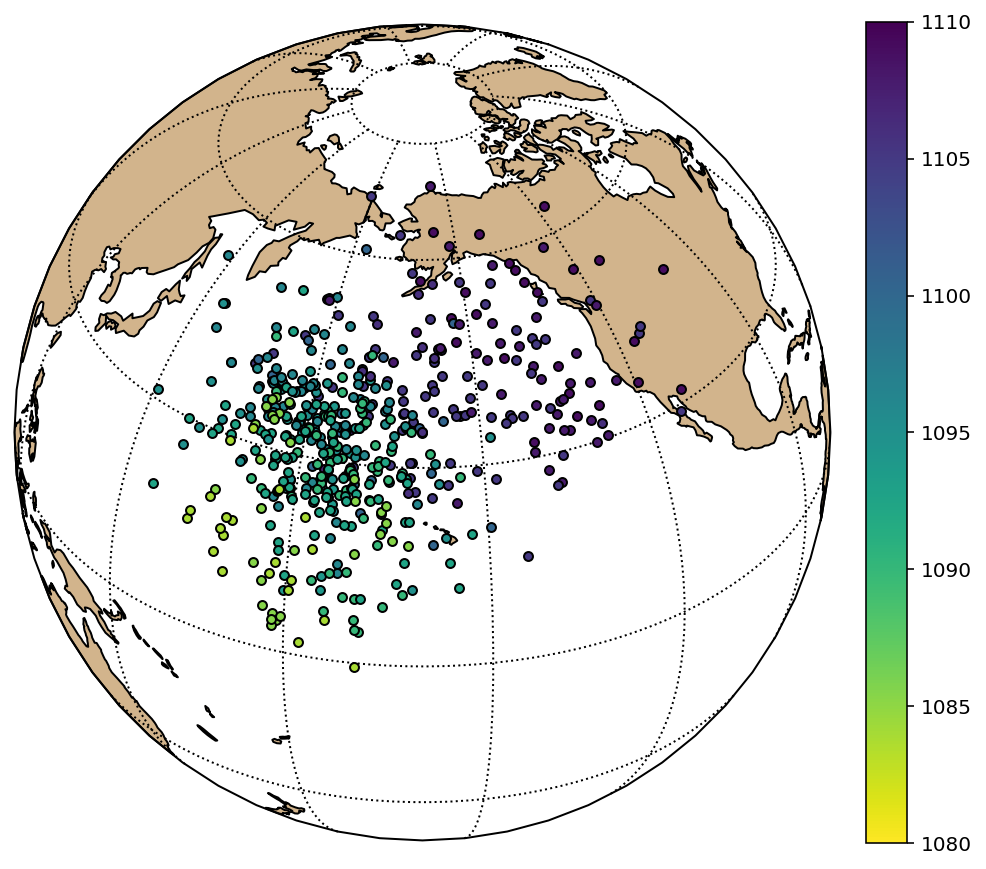

In [113]:
import matplotlib
import matplotlib.colors as colors

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=1080, vmax=1110)
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in all_site_poles.index:
    rgba = scalarMap.to_rgba(all_site_poles.age[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_vgp(m,all_site_poles.vgp_lon[n],all_site_poles.vgp_lat[n],color=hex_color)
scalarMap.set_array(np.linspace(1080,1110))    
plt.colorbar(scalarMap,orientation='vertical',fraction=0.046, pad=0.04)
#plt.savefig('Plots/Kewee_Track_Grenville_Loop.pdf')
plt.show()

## Mean APWP

In [ ]:
#Drop the two poles with less than 10 VGPs
pole_means_filtered = pole_means.drop('Osler_N')
pole_means_filtered = pole_means_filtered.drop('QM')

In [ ]:
#pole_means.to_csv('pole_means.csv')
#pole_means_filtered.to_csv('pole_means_filtered.csv')

In [ ]:
def running_mean_APWP(data,window_length,spacing,max_age,min_age,fig_name=None):
    mean_pole_ages = np.arange(min_age,max_age+spacing,spacing)
    running_means = pd.DataFrame(columns=['age','N','A95','PLon','PLat'])
    for age in mean_pole_ages:
        window_min = age - (window_length/2)
        window_max = age + (window_length/2)
        poles = pole_means.loc[(data['AgeNominal'] >= window_min) & (data['AgeNominal'] <= window_max)]
        mean = ipmag.fisher_mean(dec=poles['PLon'].tolist(),inc=poles['PLat'].tolist())
        running_means.loc[age] = [age,mean['n'],mean['alpha95'],mean['dec'],mean['inc']]
        
    m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)
    for n in range(0,len(running_means['PLon'].tolist())):
        ipmag.plot_pole(m,running_means['PLon'].tolist()[n],
                        running_means['PLat'].tolist()[n],
                        running_means['A95'].tolist()[n],
                        marker='o',color='black')
    if fig_name != None:
        plt.savefig('./Plots/'+fig_name+'.svg')
    
    return running_means

In [ ]:
RM_20_10_1110_1070 = running_mean_APWP(pole_means,20,10,1110,1070)
RM_20_10_1110_1070

In [ ]:
#RM_20_10_1115_1075 = running_mean_APWP(pole_means,20,10,1115,1075,fig_name='running_mean')
RM_20_10_1115_1075 = running_mean_APWP(pole_means,20,10,1115,1075)
RM_20_10_1115_1075

In [ ]:
RM_15_10_1115_1075 = running_mean_APWP(pole_means,15,10,1115,1075)
RM_15_10_1115_1075

# Overview APWP

In [ ]:
poles = pd.read_csv('Laurentia_poles/Laurentia_poles.csv')
poles = poles[8:]
poles.head()

In [ ]:
import matplotlib
import matplotlib.colors as colors

m = ipmag.make_orthographic_map(central_latitude=35,central_longitude=200)

viridis = cm = plt.get_cmap('viridis') 
cNorm  = matplotlib.colors.Normalize(vmin=720, vmax=1270)
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='Spectral_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
    hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)
scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='vertical',fraction=0.046, pad=0.04)
#plt.savefig('Plots/Kewee_Track_Grenville_Loop.pdf')
plt.show()